<iframe src="https://www.kaggle.com/embed/elemento/nyc-yellowtriptaxi?cellIds=10&kernelSessionId=82244098" 

# NYC Yellow Taxi Trip Data Analysis

## Information about the dataset

Details about the features of the NYC Taxi Trip Dataset can be found [here](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

The dataset contains a sample from the Yellow Taxi Trip Records Data Set provided by the TLC of NYC. 

Dataset can be found [here](https://github.com/m-gauer/NYC_TLC_Yellow_Taxi_Data/tree/main)

## Importing packages 

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import duckdb

In [2]:
#reading data
df = pd.read_csv("Yellow_Taxi_Assignment.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


In [4]:
df.shape

(304978, 19)

In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,304978.000000,295465.000000,304978.000000,295465.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,304978.000000,232346.000000,106217.000000
mean,1.672786,1.479126,4.587589,1.142931,163.744975,160.988898,1.240463,13.510189,0.903506,0.492755,2.224064,0.390715,0.312725,19.050501,2.241650,0.085815
std,0.514069,1.108255,434.226624,2.969941,66.570490,70.975905,0.528257,12.636651,1.185321,0.074023,2.765200,1.699547,0.110404,15.464014,0.791877,0.318628
min,1.000000,0.000000,-16.860000,1.000000,1.000000,1.000000,0.000000,-197.000000,-6.000000,-0.500000,-20.000000,-13.750000,-1.000000,-198.550000,-2.500000,-1.250000
25%,1.000000,1.000000,1.000000,1.000000,121.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.800000,2.500000,0.000000
50%,2.000000,1.000000,1.730000,1.000000,162.000000,162.000000,1.000000,9.500000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,0.000000
75%,2.000000,2.000000,3.210000,1.000000,234.000000,234.000000,2.000000,15.000000,1.000000,0.500000,2.950000,0.000000,0.300000,20.760000,2.500000,0.000000
max,6.000000,6.000000,177247.400000,99.000000,265.000000,265.000000,5.000000,455.000000,18.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000


In [6]:
#checking the datatypes of all the features
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

# 1. Data Cleaning 

## 1.1 Handling of NAs

In [7]:
"""
- All the 9513 records where passenger count has NA has both RatecodeID and Store_fwd_flag as NA
- 72632 records have missing values for Congestion charge
- 198761 records have missing airport fees
"""

df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            9513
trip_distance                 0
RatecodeID                 9513
store_and_fwd_flag         9513
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      72632
airport_fee              198761
dtype: int64

### 1.1.1 Passenger count 

In this section, all the missing values will be addressed by either filling them with an appropriate value, such as the median or the most frequently occurring value within that column, or alternatively, these null entries may be eliminated following a comprehensive analysis.

Passenger count is null, and the payment type is recorded as 0. One could infer that the driver potentially utilized the taxi for personal reasons and personally covered the entire cost, resulting in the payment type being indicated as 0. However, payment type 0 doesn't align with the criteria outlined in the data dictionary. Consequently, records featuring payment type 0 could be excluded from subsequent analysis.

In [8]:
df[(df['passenger_count'].isna()) & (df['payment_type'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
37873,2,2018-08-18 14:08:00,2018-08-18 14:35:00,NaN,8.75,NaN,NaN,249,227,0,33.69,2.75,0.5,0.00,5.76,0.3,43.00,NaN,NaN
40860,2,2018-09-06 13:00:00,2018-09-06 13:42:00,NaN,7.10,NaN,NaN,125,177,0,28.95,2.75,0.5,0.00,0.00,0.3,32.50,NaN,NaN
41315,2,2018-09-09 13:13:00,2018-09-09 13:41:00,NaN,6.02,NaN,NaN,225,232,0,28.95,2.75,0.5,0.00,0.00,0.3,32.50,NaN,NaN
42130,2,2018-09-14 10:32:00,2018-09-14 11:11:00,NaN,4.29,NaN,NaN,141,68,0,25.45,2.75,0.5,0.00,0.00,0.3,29.00,NaN,NaN
42676,2,2018-09-17 10:20:00,2018-09-17 10:50:00,NaN,4.36,NaN,NaN,164,74,0,28.95,2.75,0.5,0.00,0.00,0.3,32.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304819,2,2023-01-31 23:30:20,2023-01-31 23:34:38,NaN,0.82,NaN,NaN,231,144,0,15.21,0.00,0.5,3.84,0.00,1.0,23.05,NaN,NaN
304841,1,2023-01-31 18:03:53,2023-01-31 18:42:25,NaN,10.40,NaN,NaN,79,138,0,44.30,7.50,0.5,5.74,6.55,1.0,68.09,NaN,NaN
304842,2,2023-01-31 21:27:23,2023-01-31 21:46:06,NaN,9.68,NaN,NaN,231,129,0,33.86,0.00,0.5,7.57,0.00,1.0,45.43,NaN,NaN
304924,2,2023-01-31 09:07:56,2023-01-31 09:22:34,NaN,2.16,NaN,NaN,262,163,0,15.81,0.00,0.5,1.98,0.00,1.0,21.79,NaN,NaN


In [9]:
#removing records where passenger count is null and assigning it to new filtered dataframe 
filtered_df = df[~df['passenger_count'].isna()].reset_index(drop=True)

### 1.1.2 Congestion surcharge 


Congestion zone details are shown [here](https://www.nyc.gov/site/tlc/about/congestion-surcharge.page)

There are 25% of records with missing values for the Congestion surcharge field.
Also, we can see that there are almost all the locations which have the entries for congestion charge. But according to the NYC government, trips in taxis will be charged a surcharge for trips that only start, end or pass through Congestion Zone. The Congestion Zone is **Manhattan, south of 96th Street.**

It's evident that over 70% of the data entries are assigned a value of \\$2.5, indicating that drivers have imposed the congestion fee for a majority of those trips. Since it's not feasible to determine the specific zones where the congestion fees were applied, let's replace all the missing values with the median value.

In [10]:
df['congestion_surcharge'].isna().sum()

72632

In [11]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.50    209224
 0.00     22228
-2.50       891
 2.75         2
 0.50         1
Name: count, dtype: int64

In [12]:
#DropOff locations where congestion charge has been applied
df[df['congestion_surcharge']>0]['DOLocationID'].nunique()

245

In [13]:
#PickUp locations where congestion charge has been applied
df[df['congestion_surcharge']>0]['PULocationID'].nunique()

158

In [14]:
#finding median of congestion surcharge
filtered_df['congestion_surcharge'].median()

2.5

In [15]:
#imputing all the nulls with median value
filtered_df['congestion_surcharge'] = filtered_df["congestion_surcharge"].\
                                     fillna(filtered_df['congestion_surcharge'].median())

### 1.1.3 Airport fee 


As per data dictionary, airport fee of $1.25 has to be collected only at 132 = JFK Airport and 138 = LaGuardia Airport.

However, it's noticeable that airport fees have been levied at numerous additional locations too. Consequently, we can assign a fee of 0 to all other locations and should communicate this inconsistency to the higher management.

In [16]:
df[df['airport_fee'].isna()].shape

(198761, 19)

In this context, we observe that there are missing values for the airport fee, even though the pick-up locations are indicated as LaGuardia Airport and JFK Airport. As a solution, we can fill in the missing values for those particular records with the amount of \\$1.25.

In [17]:
filtered_df['airport_fee'] = np.where(((filtered_df['airport_fee'].isnull()) & ((filtered_df['PULocationID']==132) \
                                                              | (filtered_df['PULocationID']==138))), 1.25 ,\
                                                                  filtered_df['airport_fee'])

The remaining nulls in the airport fee column, which pertain to non-airport locations, are now populated with zeros.

In [18]:
filtered_df['airport_fee'] = np.where(filtered_df['airport_fee'].isnull() , 0 , filtered_df['airport_fee'])

In this scenario, we observe that no airport fee has been recorded even when the pick-up location is specified as LaGuardia Airport or JFK Airport. This inconsistency should be acknowledged, and necessary actions should be taken to rectify it.

In [19]:
filtered_df[(filtered_df['airport_fee'] == 0) & \
            ((filtered_df['PULocationID']==132) | (filtered_df['PULocationID']==138))]. shape

(509, 19)

In [20]:
#imputing all the records where pick up location is either of the airports, with $1.25
filtered_df['airport_fee'] = np.where(((filtered_df['airport_fee']==0) &\
                                       ((filtered_df['PULocationID']==132) | (filtered_df['PULocationID']==138))),\
                                         1.25 , filtered_df['airport_fee'])


### Dataframe after handling all the nulls

In [21]:
filtered_df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

## 2. Other Observations

The passenger count is listed as zero, while the Payment type column indicates both credit card and cash payments. One possible explanation is that the passenger count is a value entered by the driver and they might have unintentionally omitted entries in such instances. Alternatively, this could be attributed to a high occurrence of records where VendorID is equal to 1 (Creative Mobile Technologies, LLC), the authorized technology provider for the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). This situation may arise due to potential inaccuracies or unreliability in trip data generated by Creative Mobile Technologies.

As a solution, we have two options: we can either retain the value of 0 or replace it with 1. This decision is driven by the fact that a majority of records have a passenger count of 1.

In [22]:
filtered_df[(filtered_df['passenger_count'] == 0)] [['payment_type','VendorID']].value_counts()

payment_type  VendorID
1             1           3974
2             1           1363
3             1            142
4             1             38
1             2             17
5             1              1
Name: count, dtype: int64

Also, the passenger count is recorded as 0, while the total trip amount is nonzero. Moreover, a significant portion of these instances is associated with VendorID equal to 1, which corresponds to Creative Mobile Technologies, LLC. Given these findings, it can be inferred that the accuracy and reliability of trip data generated by Creative Mobile Technologies might be compromised.

In [23]:
filtered_df[(filtered_df['passenger_count']==0) & (df['total_amount']>0)] ['VendorID'].value_counts()

/var/folders/44/b4v9mrxs7hnbfqgczjqb4jwh0000gn/T/ipykernel_11286/1074114287.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df[(filtered_df['passenger_count']==0) & (df['total_amount']>0)] ['VendorID'].value_counts()


VendorID
1    5487
2      17
Name: count, dtype: int64

The majority of entries with total amounts below zero correspond to payment types 3 and 4, namely "No charge" and "Dispute," respectively. This trend potentially indicates that the company has compensated clients and consequently faced financial loss.

In [24]:
filtered_df[filtered_df['total_amount']<0]['payment_type'].value_counts()

payment_type
4    605
3    340
2    215
1      2
Name: count, dtype: int64

## 3. Handling unknown values

### 3.1 RatecodeID 


As per the data dictionary, RatecodeID is classified into six distinct categories. However, in this dataset, there's an unidentified category labeled as 99. Therefore, it is better to exclude records where 'RatecodeID' is equal to 99.

In [25]:
filtered_df['RatecodeID'].value_counts()

RatecodeID
1.0     285278
2.0       7389
5.0       1607
3.0        621
4.0        301
99.0       268
6.0          1
Name: count, dtype: int64

In [26]:
filtered_df = filtered_df[filtered_df['RatecodeID']!=99].reset_index(drop=True)

### 3.2 PickUp location and DropOff location
Removing unknown locations using TLC Taxi Zone lookup for NYC

<img src="https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_manhattan.jpg" alt="drawing" style="width:300px;"/>

The information retrieved from the source https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_manhattan.jpg indicates that New York's Taxi Zones are visually mapped. Consequently, only zones present on this map are considered relevant, as our focus is solely on trips occurring within New York.

The provided CSV file - https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv
contains comprehensive details about the city's zones. These zones are numbered from 1 to 265, with 264 and 265 being designated as "Unknown." Therefore, we have the option to either eliminate the 5,236 records in which the PickUp and DropOff locations are labeled as "Unknown," or retain them. I opt to remove these records.

In [27]:
filtered_df.shape

(295197, 19)

In [28]:
filtered_df = filtered_df[(filtered_df['PULocationID']!=264) & (filtered_df['PULocationID']!=265)].reset_index(drop=True)

In [29]:
filtered_df = filtered_df[((filtered_df['DOLocationID']!=264) & (filtered_df['DOLocationID']!=265))].reset_index(drop=True)

In [30]:
filtered_df.shape

(290602, 19)

### 3.3 VendorID
 

Based on the provided data dictionary, we are aware that VendorID can exclusively take the values 1 or 2. Consequently, we have the option to eliminate the 1,024 records which are in the main dataframe with VendorID values of 4, 5, or 6, or alternatively, replace these VendorID values with either 1 or 2.
A portion of them has already been eliminated in the filtered data after undergoing pre-processing. Let's remove the remaining ones.

In [31]:
df['VendorID'].value_counts()

VendorID
2    201068
1    102886
6       521
4       500
5         3
Name: count, dtype: int64

In [32]:
filtered_df = filtered_df[filtered_df['VendorID']!=4].reset_index(drop=True)

In [33]:
filtered_df['VendorID'].value_counts()

VendorID
2    190579
1     99525
Name: count, dtype: int64

### 3.4 Trip duration

In [34]:
#converting pick and dropoff datetime columns from Object to Datetime datatype
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

In [35]:
#let's calculate the new column named Trip duration 
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).\
                                astype('timedelta64[s]')

In [36]:
seconds = np.timedelta64(1,'s')
filtered_df['trip_duration'] = filtered_df['trip_duration']/seconds

In [37]:
#Converting trip duration to minutes
filtered_df['trip_duration_min'] = filtered_df['trip_duration']/(60)

The drop-off time must be later than the pick-up time. There exists a single record where the trip duration is negative, indicating an inconsistency. This record should be excluded from the dataset.

In [38]:
filtered_df[filtered_df['trip_duration']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_min
49568,1,2018-11-04 01:58:26,2018-11-04 01:14:18,2.0,2.4,1.0,N,246,148,1,...,0.5,0.5,3.3,0.0,0.3,16.6,2.5,0.0,-2648.0,-44.133333


In [39]:
filtered_df = filtered_df[filtered_df['trip_duration']>0].reset_index(drop=True)

# 4. Outlier Detection

### 4.1 Trip distance 


<Axes: ylabel='trip_distance'>

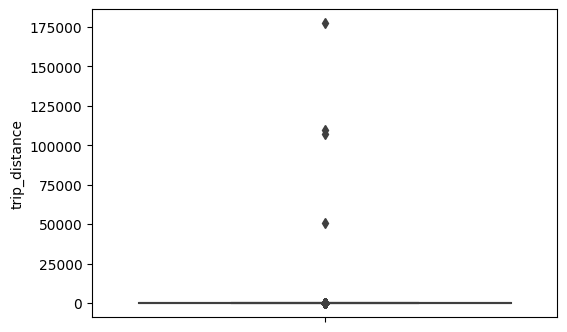

In [40]:
plt.figure(figsize = (6, 4))
sns.boxplot(y="trip_distance", data = df)

In [41]:
filtered_df['trip_distance'].quantile(q=0.9999)

36.59920799999905

In light of the preceding analysis, nearly 99.99% of the data exhibits a trip distance of less than 36.5 miles. However, certain records which display trip distance values exceeding 50,000 miles were already removed while performing other data cleaning process.

The subsequent boxplot visualizes that such outliers have already been excluded from the refined dataframe.

<Axes: ylabel='trip_distance'>

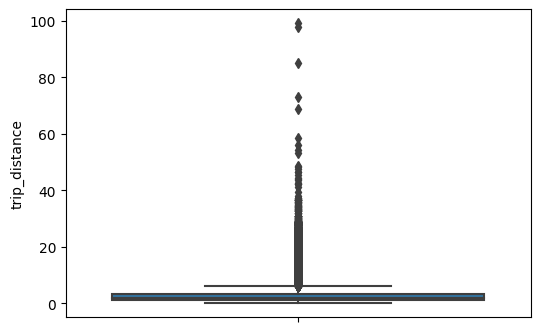

In [42]:
#after removing the outliers
plt.figure(figsize = (6, 4))
sns.boxplot(y="trip_distance", data = filtered_df)

<Axes: xlabel='trip_distance', ylabel='Count'>

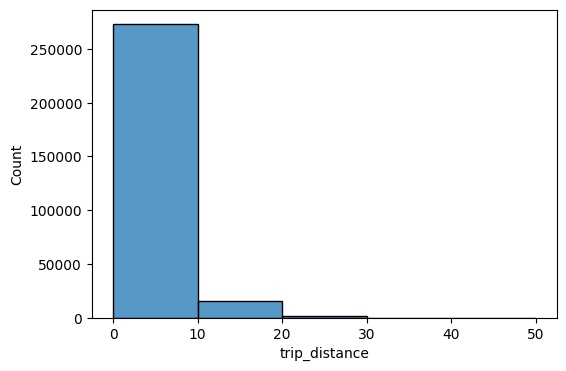

In [43]:
#after removing the outliers
plt.figure(figsize = (6, 4))
sns.histplot(x="trip_distance", data = filtered_df, binwidth=10, binrange=(0,50))

### 4.2 Trip duration

<Axes: ylabel='trip_duration_min'>

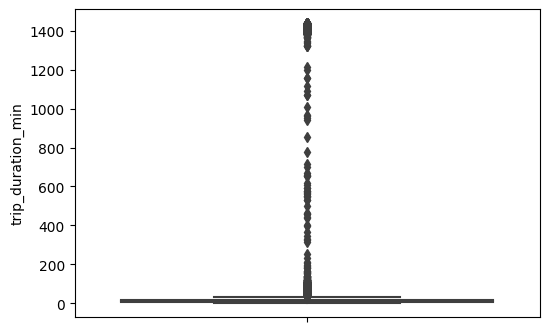

In [44]:
plt.figure(figsize = (6, 4))
sns.boxplot(y="trip_duration_min", data = filtered_df)

<Axes: xlabel='trip_duration_min', ylabel='Count'>

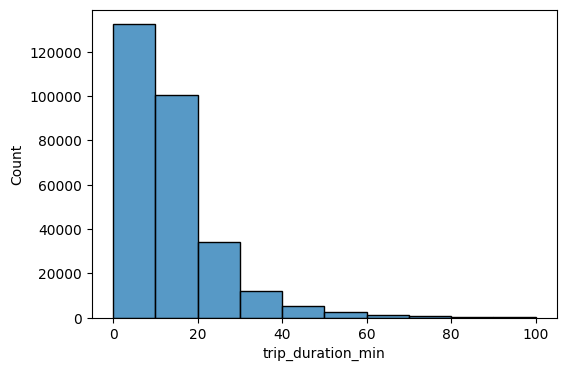

In [45]:
plt.figure(figsize = (6, 4))
sns.histplot(x="trip_duration_min", data = filtered_df,binwidth=10, binrange=(0,100))

In [46]:
upper_limit = filtered_df['trip_duration_min'].quantile(q=0.99)
upper_limit

60.001999999999924

In [47]:
lower_limit = filtered_df['trip_duration_min'].quantile(q=0.0001)
lower_limit

0.03333333333333333

Given that 99% of the entries have trip durations spanning less than 60 minutes, I am opting to exclude 3,066 records that are regarded as outliers for the purpose of subsequent analysis.

In [48]:
# Removing outliers based on our analysis 
filtered_df = filtered_df[(filtered_df['trip_duration_min'] < upper_limit) & (filtered_df['total_amount'] \
                                                                              > lower_limit)].reset_index(drop=True)

### 4.3 Total amount

<Axes: ylabel='total_amount'>

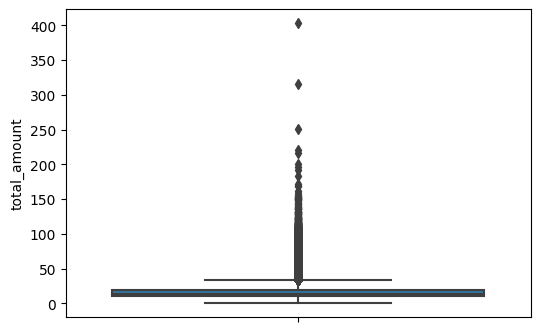

In [49]:
plt.figure(figsize = (6, 4))
sns.boxplot(y="total_amount", data = filtered_df)

<Axes: xlabel='total_amount', ylabel='Count'>

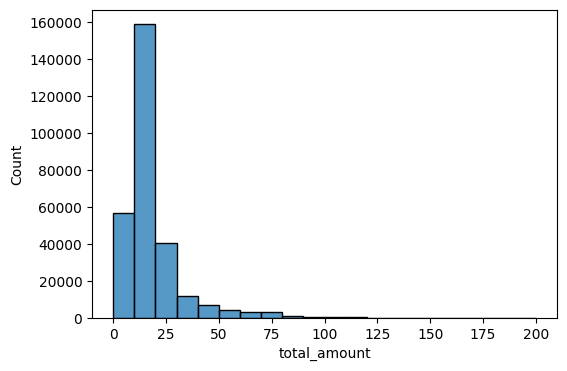

In [50]:
plt.figure(figsize = (6, 4))
sns.histplot(x="total_amount", data = filtered_df,binwidth=10, binrange=(0,200))

In [51]:
upper_limit = filtered_df['total_amount'].quantile(q=0.9999)
upper_limit

143.49719999990776

In [52]:
lower_limit = filtered_df['total_amount'].quantile(q=0.004)
lower_limit

4.3

In [53]:
# Removing outliers based on our analysis 
filtered_df = filtered_df[(filtered_df['total_amount'] < upper_limit) & (filtered_df['total_amount'] > lower_limit)]\
                .reset_index(drop=True)

Given that 99.99% of the entries have total trip amount less than $143, I am opting to exclude those records for the purpose of further analysis.

# 5. Feature Engineering

### 5.1 Year, Month, Weekday_Name, Day, Date and Hour extraction

We'll generate new features by extracting information from the pickup_datetime column. These attributes will encompass the year, month, day, date, hour, and weekday name.

In [54]:
filtered_df['year'] = filtered_df['tpep_pickup_datetime'].dt.year
filtered_df['month'] = filtered_df['tpep_pickup_datetime'].dt.month
filtered_df['weekday_name'] = filtered_df['tpep_pickup_datetime'].dt.day_name()
filtered_df['day'] = filtered_df['tpep_pickup_datetime'].dt.day
filtered_df['date'] = filtered_df['tpep_pickup_datetime'].dt.date
filtered_df['hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

In [55]:
#reading taxi zones lookup data
taxi_zone_lookup_df = pd.read_csv("taxi+_zone_lookup.csv")

In [56]:
taxi_zone_lookup_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### 5.2 PUborough, DOborough, PUzone, and DOzone creation

We will execute a query to combine the taxi zone dataset and our primary filtered NYC taxi dataset based on location IDs. This merge is intended to associate location IDs with their corresponding borough and zone names.
Subsequently, we have introduced additional columns named PUborough, DOborough, PUzone, and DOzone.

In [57]:
query = (f"""
          with cte as(
          select a.*,
            b.Borough as PUborough,
            b.Zone as PUzone
            from taxi_zone_lookup_df b
            inner join filtered_df a
            on a.PULocationID = b.LocationID
          )
          
          select c.*,
                 d.Borough as DOborough,
                 d.Zone as DOzone,
          from cte c
          inner join taxi_zone_lookup_df d
          on c.DOLocationID = d.LocationID
          """)

In [58]:
filtered_df = duckdb.query(query).to_df()

In [59]:
filtered_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,year,month,weekday_name,day,date,hour,PUborough,PUzone,DOborough,DOzone
0,2,2021-08-22 22:39:30,2021-08-22 23:02:30,1.0,9.49,1.0,N,138,225,1,...,2021,8,Sunday,22,2021-08-22,22,Queens,LaGuardia Airport,Brooklyn,Stuyvesant Heights
1,2,2021-08-22 21:10:27,2021-08-22 21:17:55,3.0,1.25,1.0,N,186,170,1,...,2021,8,Sunday,22,2021-08-22,21,Manhattan,Penn Station/Madison Sq West,Manhattan,Murray Hill
2,2,2021-08-22 20:36:17,2021-08-22 20:47:09,2.0,3.29,1.0,N,113,229,1,...,2021,8,Sunday,22,2021-08-22,20,Manhattan,Greenwich Village North,Manhattan,Sutton Place/Turtle Bay North
3,1,2021-08-22 13:08:40,2021-08-22 13:13:26,1.0,0.90,1.0,N,161,230,1,...,2021,8,Sunday,22,2021-08-22,13,Manhattan,Midtown Center,Manhattan,Times Sq/Theatre District
4,2,2021-08-22 13:35:15,2021-08-22 13:36:57,1.0,0.65,1.0,N,75,75,2,...,2021,8,Sunday,22,2021-08-22,13,Manhattan,East Harlem South,Manhattan,East Harlem South


# 6. EDA

In [60]:
import warnings
warnings.filterwarnings("ignore")

### 6.1 Passenger Count

In [61]:
passanger_df = filtered_df.passenger_count.value_counts().reset_index(drop=False)

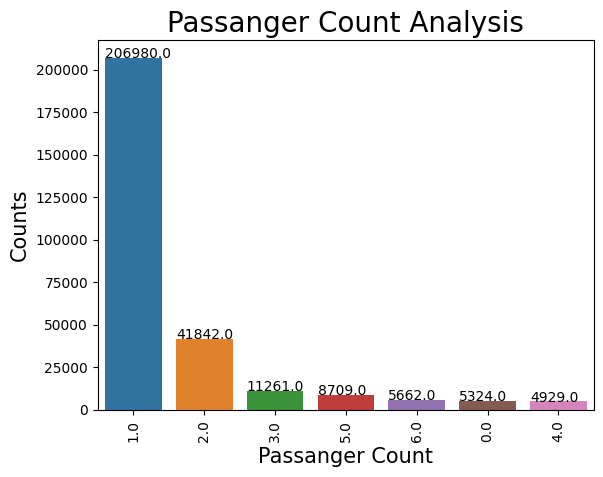

In [62]:
g = sns.barplot(data=passanger_df, x="passenger_count", y="count", order = passanger_df['passenger_count'])
g.set_title("Passanger Count Analysis", fontsize = 20)
g.set_xlabel("Passanger Count", fontsize = 15)
g.set_ylabel("Counts", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 10)
for p in g.patches:
    text = str(np.nan_to_num(p.get_height(), 0).round(2))
    text_x = p.get_x()
    text_y = np.nan_to_num(p.get_height(),0)
    g.text(text_x,text_y,text,fontsize = 10)   
plt.show()

**Observation**: A majority of over 72% of the journeys feature a passenger count of 1. This suggests that solo travelers exhibit a pronounced preference for yellow taxis.

### 6.2 PickUp Location

In [63]:
pickup_location_df = filtered_df['PUzone'].value_counts().reset_index(drop=False).rename(columns={'count':'counts'})

In [64]:
pickup_location_df = pickup_location_df.loc[0:4]

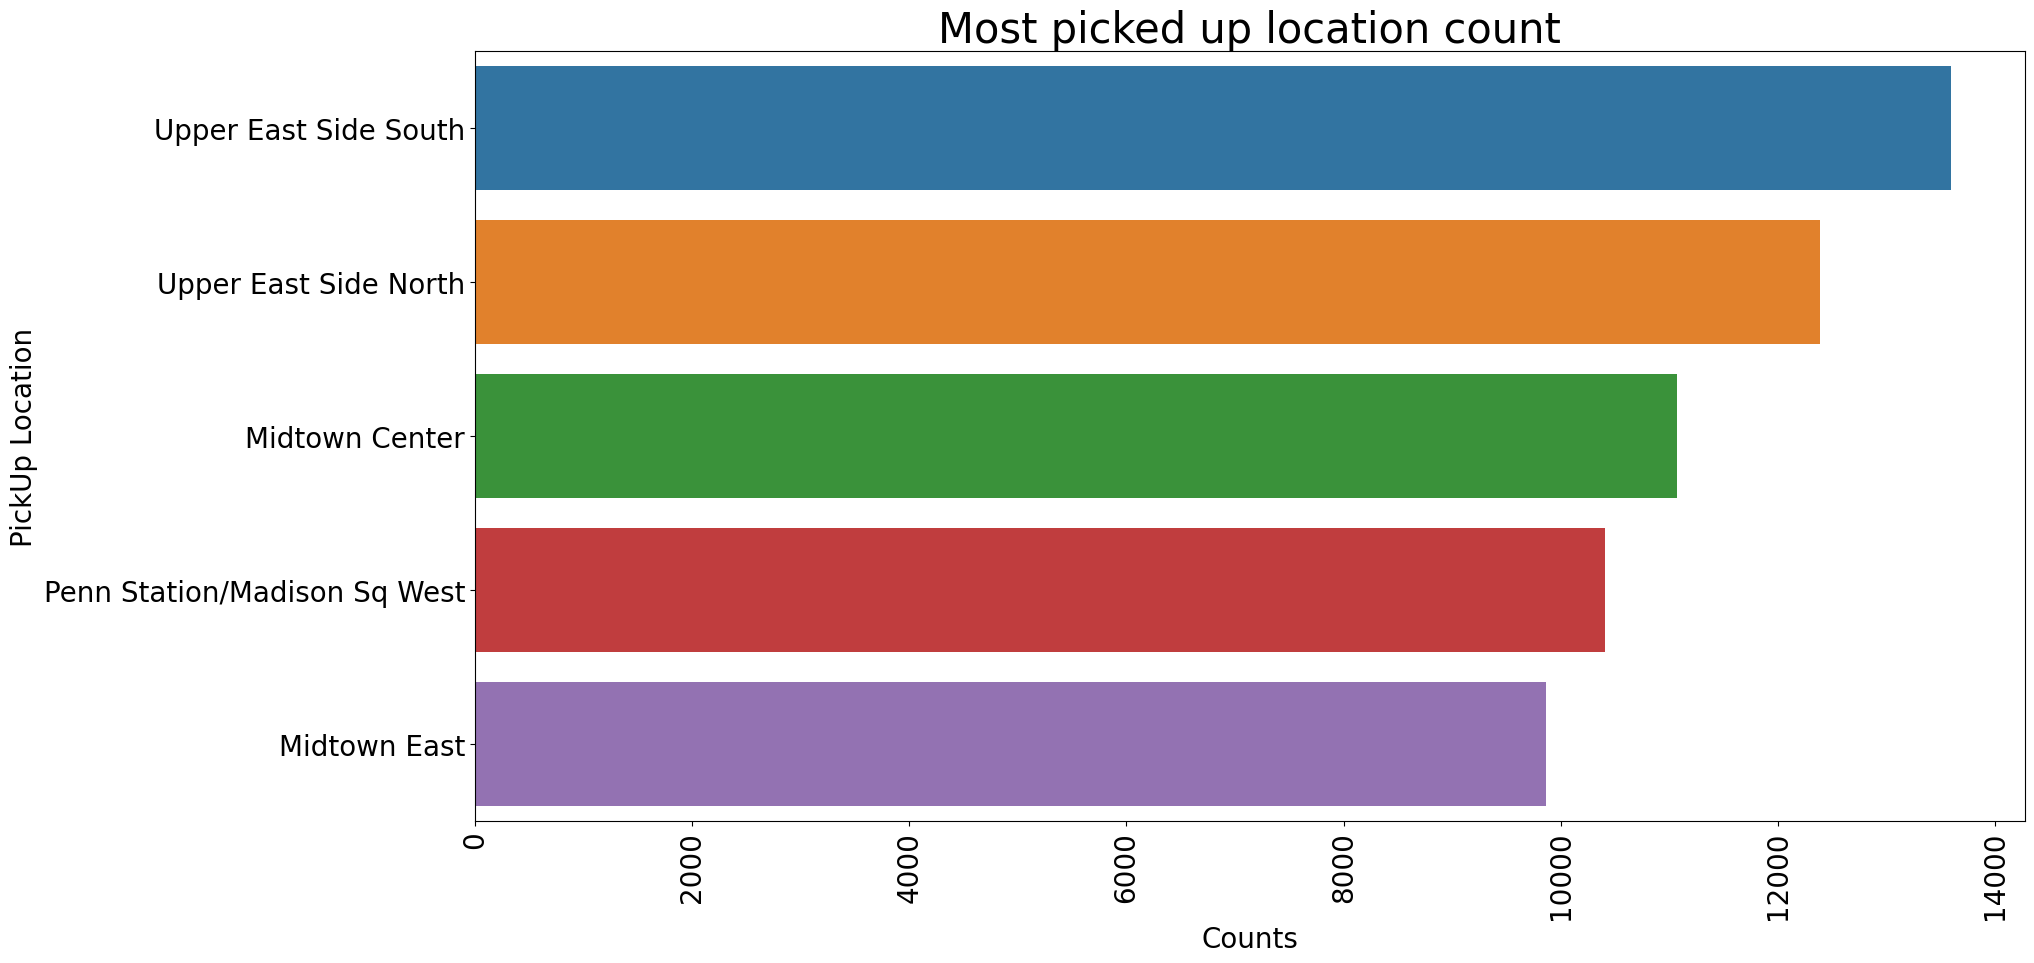

In [65]:
plt.figure(figsize=(20,10))
g = sns.barplot(data=pickup_location_df, x="counts", y="PUzone")
g.set_title("Most picked up location count", fontsize = 30)
g.set_xlabel("Counts", fontsize = 20)
g.set_ylabel("PickUp Location", fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 20)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 20)
plt.show()

**Observation**: The preceding figure illustrates the leading five pick-up zones within NYC. Notably, the most frequently picked up location in Manhattan is the **Upper East Side South zone**.

### 6.3 DropOff Location

In [66]:
dropoff_location_df = filtered_df['DOzone'].value_counts().reset_index(inplace=False)

In [67]:
dropoff_location_df = dropoff_location_df.loc[0:4]

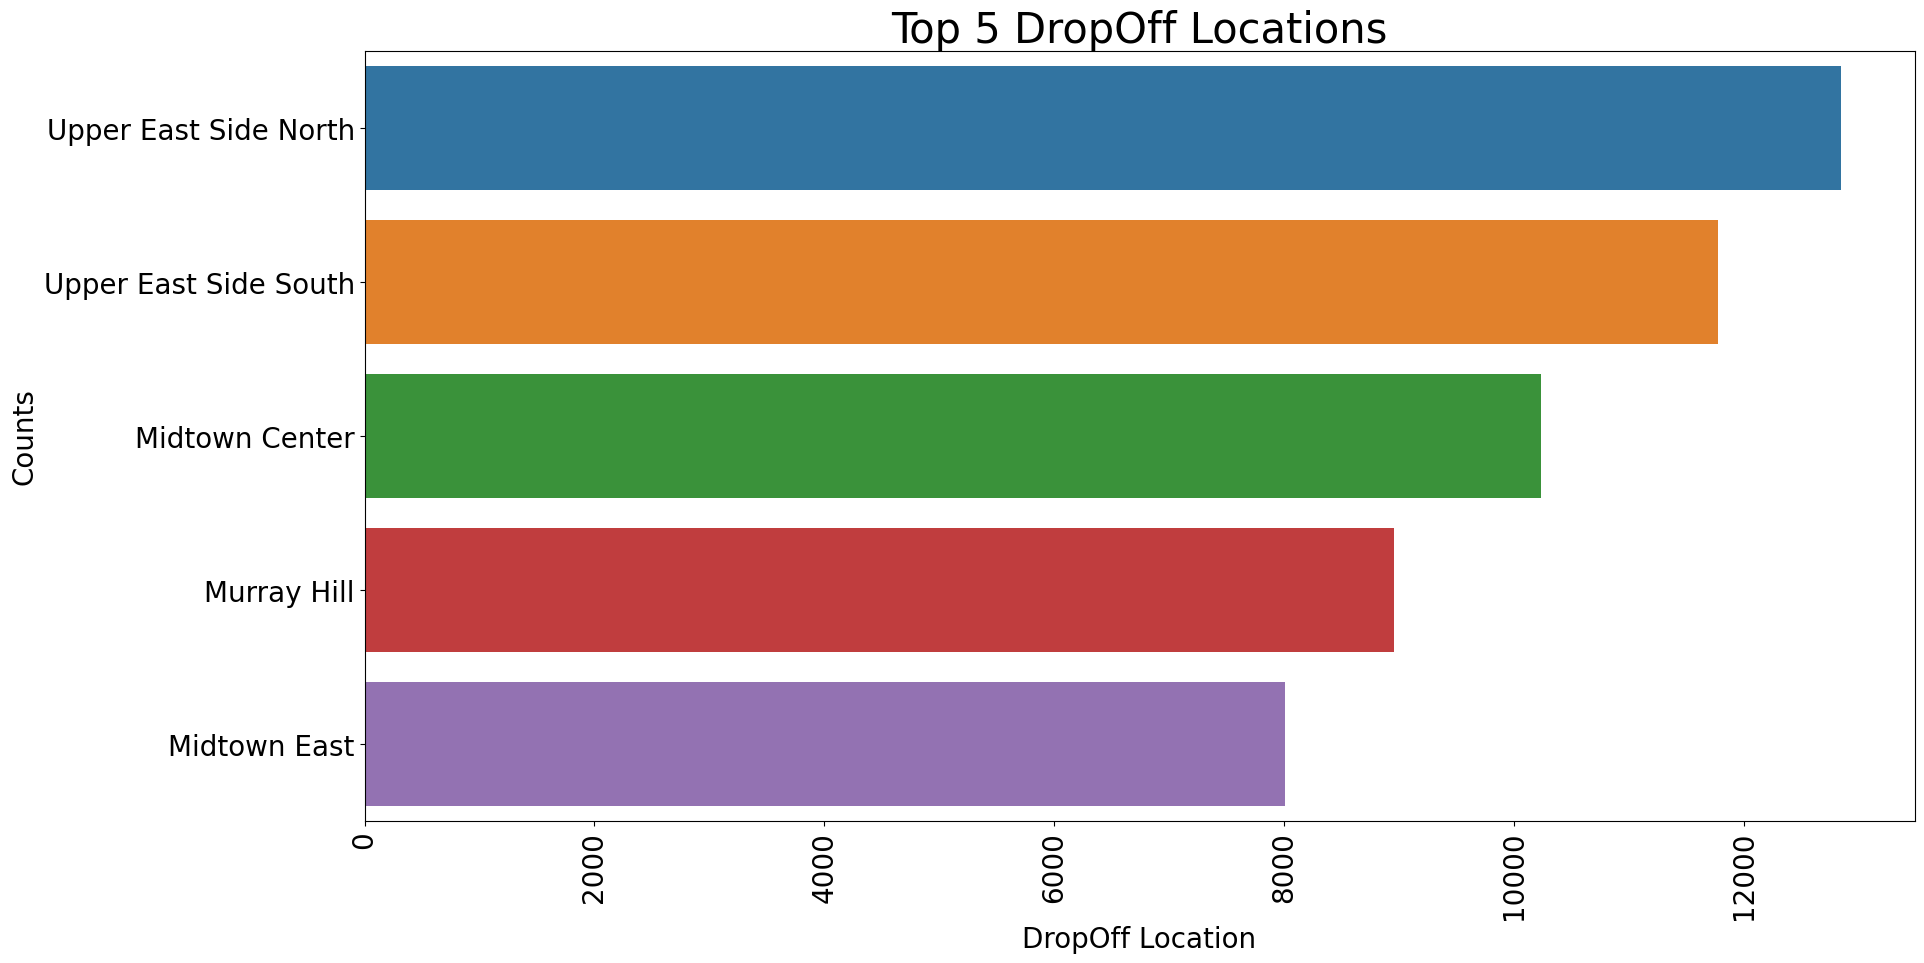

In [68]:
plt.figure(figsize=(20,10))
g = sns.barplot(data=dropoff_location_df, x="count", y="DOzone", order = dropoff_location_df['DOzone'])
g.set_title("Top 5 DropOff Locations", fontsize = 30)
g.set_xlabel("DropOff Location", fontsize = 20)
g.set_ylabel("Counts", fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 20)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 20)
plt.show()

**Observation**: The provided visualization highlights the top five drop-off zones in New York City. Among these, the most prevalent drop-off location in Manhattan is **Upper East Side North zone**.

### 6.4 Payment Type

In [69]:
#The values have been associated with their respective payment modes based on the provided mapping in the dataset. 
#This has been done to enhance clarity and comprehension.
payment_dict = {0:'Not aware', 1:'Credit Card',2:'Cash', 3: 'No charge', 4:'Dispute',5: 'Unknown', 6: 'Voided trip'}
payment_dict

{0: 'Not aware',
 1: 'Credit Card',
 2: 'Cash',
 3: 'No charge',
 4: 'Dispute',
 5: 'Unknown',
 6: 'Voided trip'}

In [70]:
filtered_df['payment_type_str']  = filtered_df['payment_type'].map(payment_dict)
filtered_df[['payment_type','payment_type_str']]

,payment_type,payment_type_str
0,1,Credit Card
1,1,Credit Card
2,1,Credit Card
3,1,Credit Card
4,2,Cash
...,...,...
284702,1,Credit Card
284703,1,Credit Card
284704,1,Credit Card
284705,2,Cash


In [71]:
payment_type_df = filtered_df['payment_type_str'].value_counts().reset_index(inplace=False)

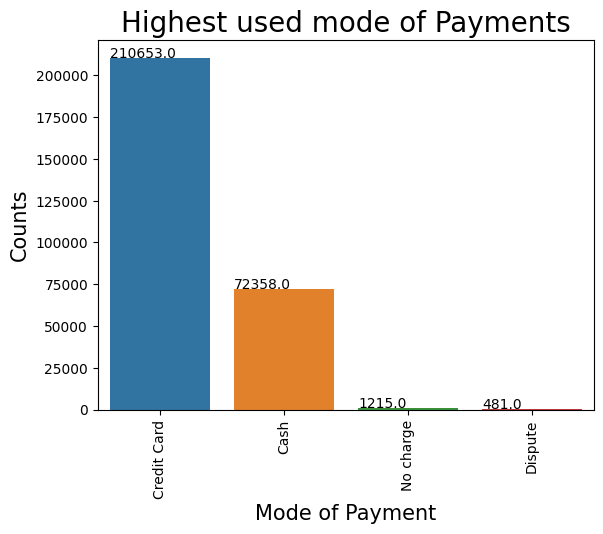

In [72]:
g = sns.barplot(data=payment_type_df, x="payment_type_str", y="count")
g.set_title("Highest used mode of Payments", fontsize = 20)
g.set_xlabel("Mode of Payment", fontsize = 15)
g.set_ylabel("Counts", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 10)
for p in g.patches:
    text = str(np.nan_to_num(p.get_height(), 0).round(2))
    text_x = p.get_x()
    text_y = np.nan_to_num(p.get_height(),0)
    g.text(text_x,text_y,text,fontsize = 10)  
plt.show()

**Observation**: The above visualization displays the top four payment methods used for taxi trips. The predominant mode of payment is **Credit Card**, followed by Cash.

### 6.5 Total Number of Trips for every month across years

In [73]:
data_agg = filtered_df.groupby(['year', 'month']).size().reset_index(name='num_trips')
data_agg

,year,month,num_trips
0,2018,1,4821
1,2018,2,4836
2,2018,3,4795
3,2018,4,4783
4,2018,5,4771
...,...,...,...
56,2022,9,4517
57,2022,10,4589
58,2022,11,4564
59,2022,12,4540


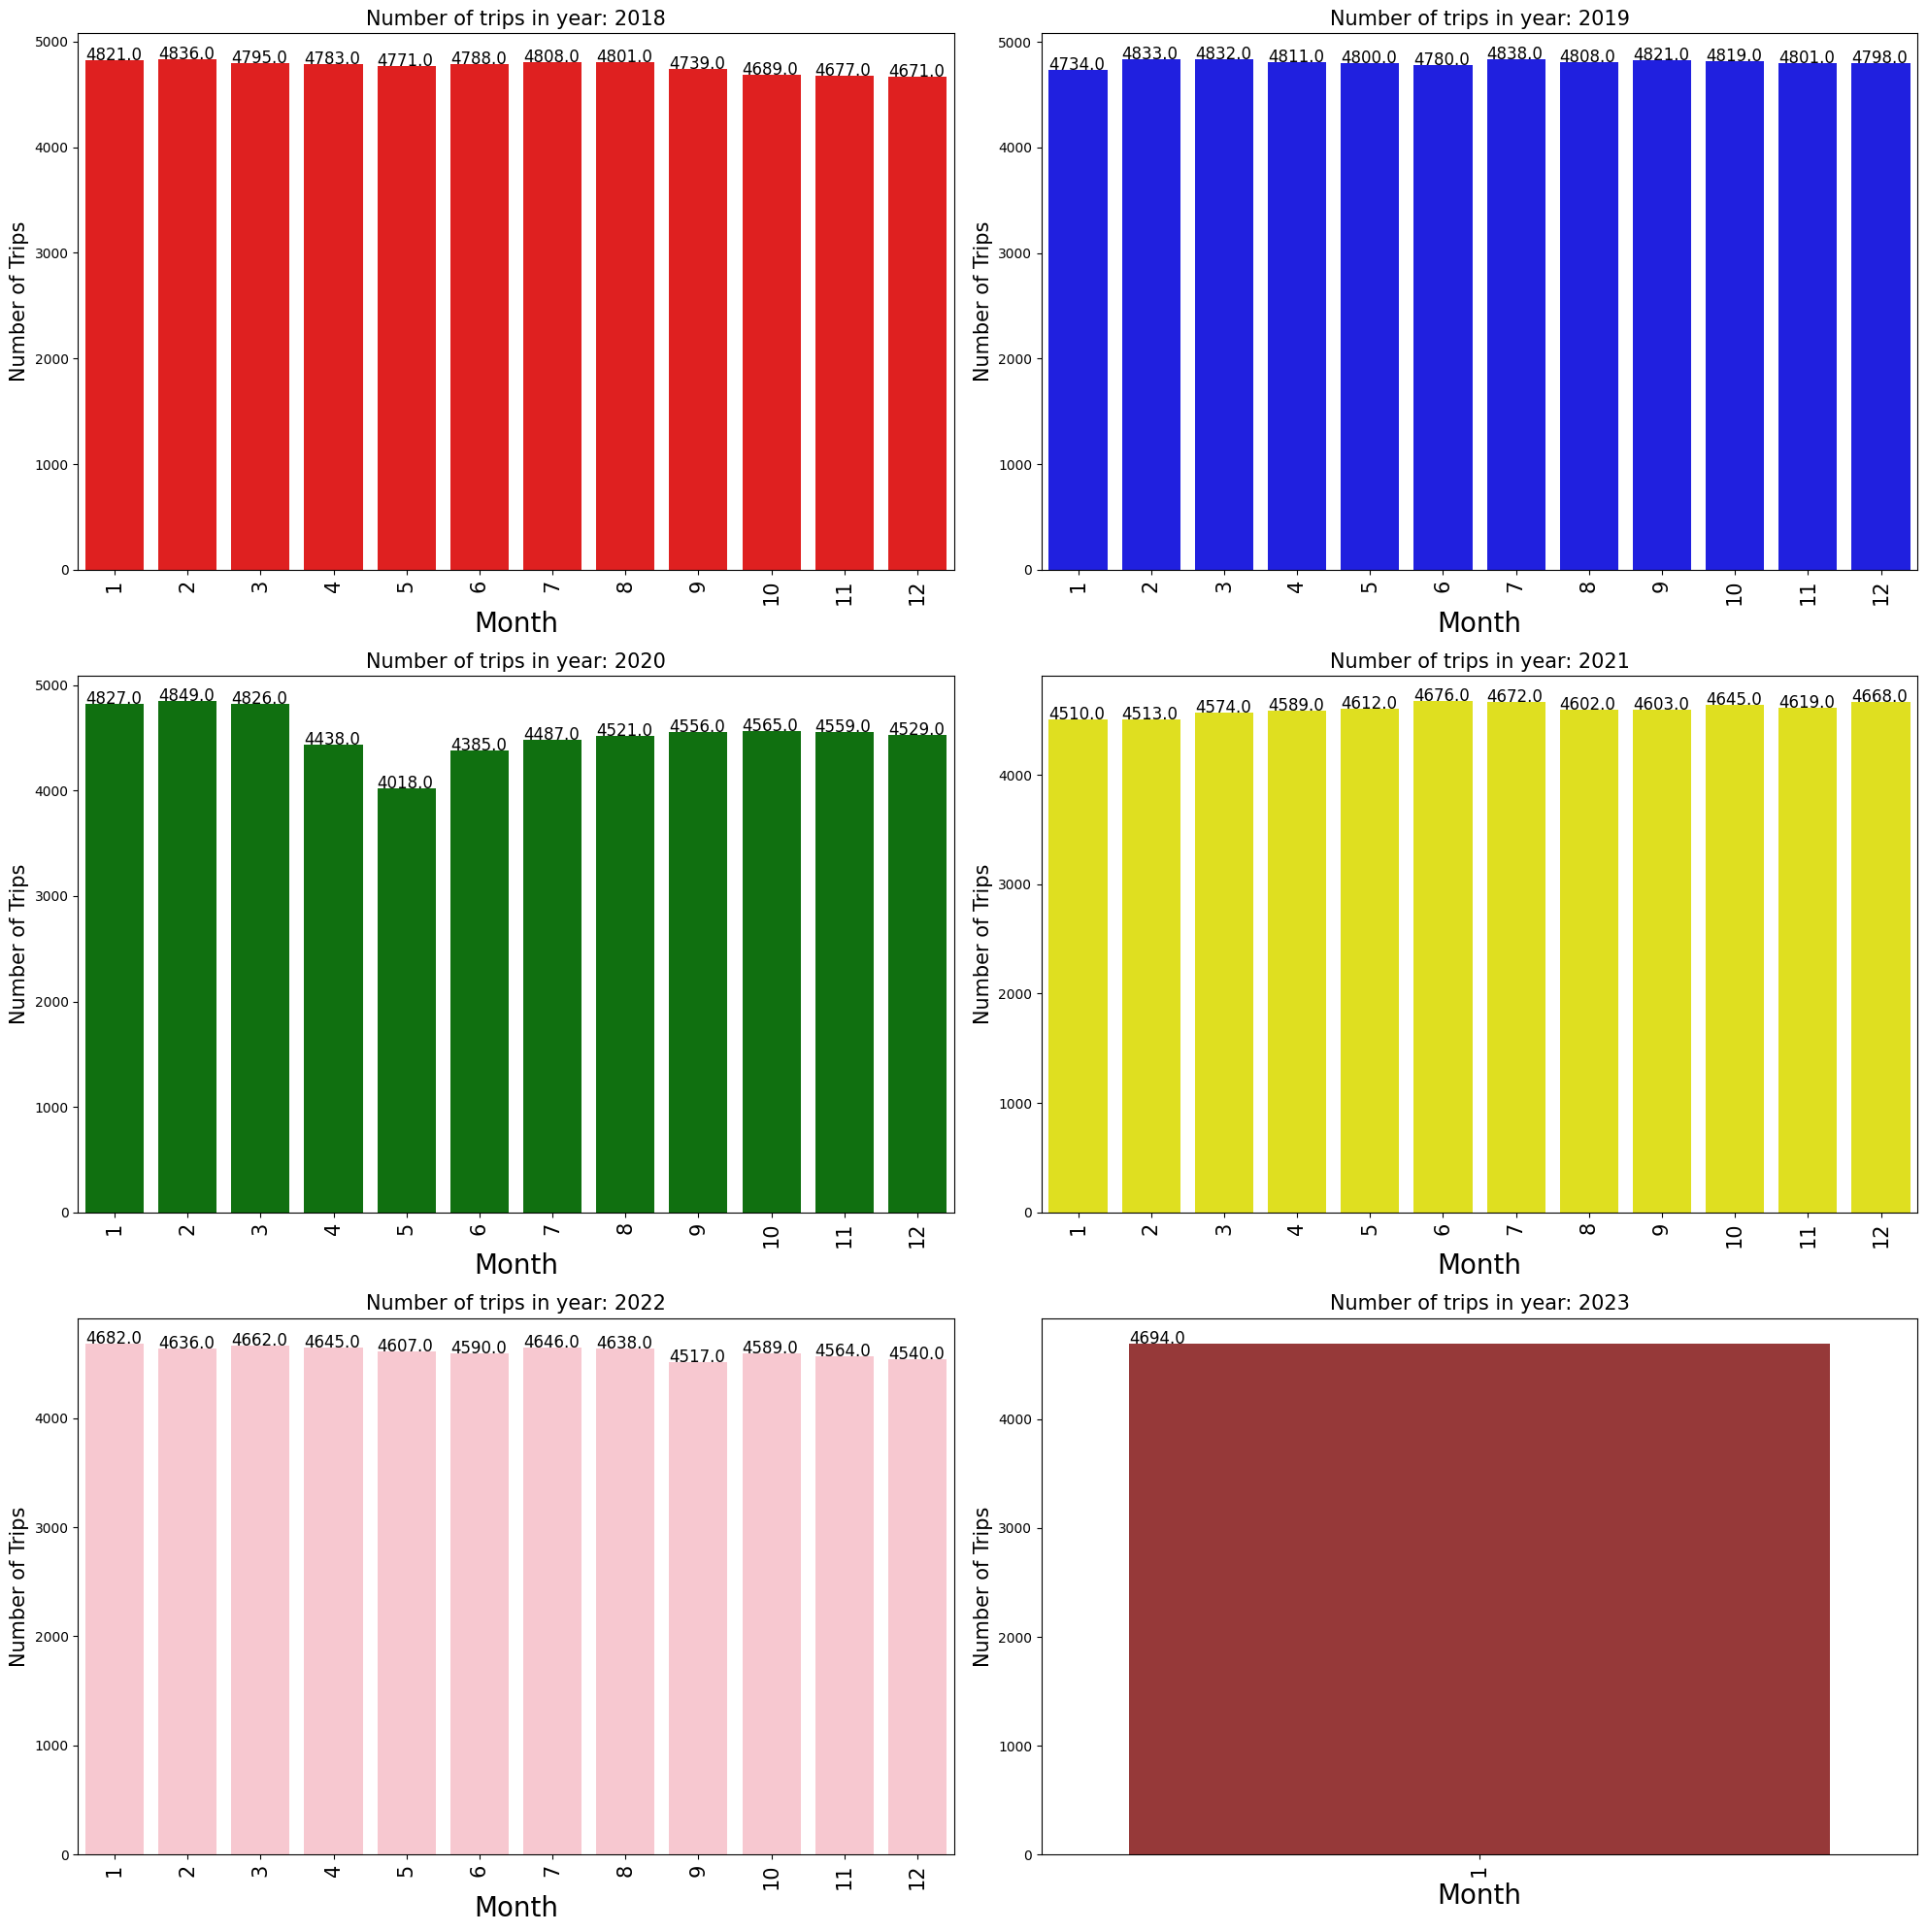

In [74]:
fig, ax = plt.subplots(3,2, figsize = (20,20))

year = [2018,2019,2020,2021,2022,2023]
colors = ['red','blue','green','yellow','pink','brown']

for m, a, c in (zip(year, ax.flatten(),colors)):
    g = sns.barplot(x = 'month', y = 'num_trips', data = data_agg[(data_agg["year"] == m)], ax = a, color = c)
    a.set_title("Number of trips in year: " + str(m), fontsize = 15)
    a.set_xlabel("Month", fontsize = 20)
    a.set_ylabel("Number of Trips", fontsize = 15)
#     g.set_ylim(0, 130)
    g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)
    for p in g.patches:
        text = str(np.nan_to_num(p.get_height(), 0).round(2))
        text_x = p.get_x()
        text_y = np.nan_to_num(p.get_height(),0)
        g.text(text_x,text_y,text,fontsize = 12)
fig.tight_layout()
plt.show()

**Observation:** The above graph indicates a consistent trip count over the span of the last five years. Notably, a decline is observable in March and April 2020, which can likely be attributed to the Covid lockdown enforced at the start of March month in New York City, USA.

### 6.6 Total Number of Trips over weekdays across years

In [75]:
data_agg_week = filtered_df.groupby(['year', 'weekday_name']).size().reset_index(name='num_trips')
data_agg_week.head()

,year,weekday_name,num_trips
0,2018,Friday,8698
1,2018,Monday,7687
2,2018,Saturday,8355
3,2018,Sunday,7228
4,2018,Thursday,8578


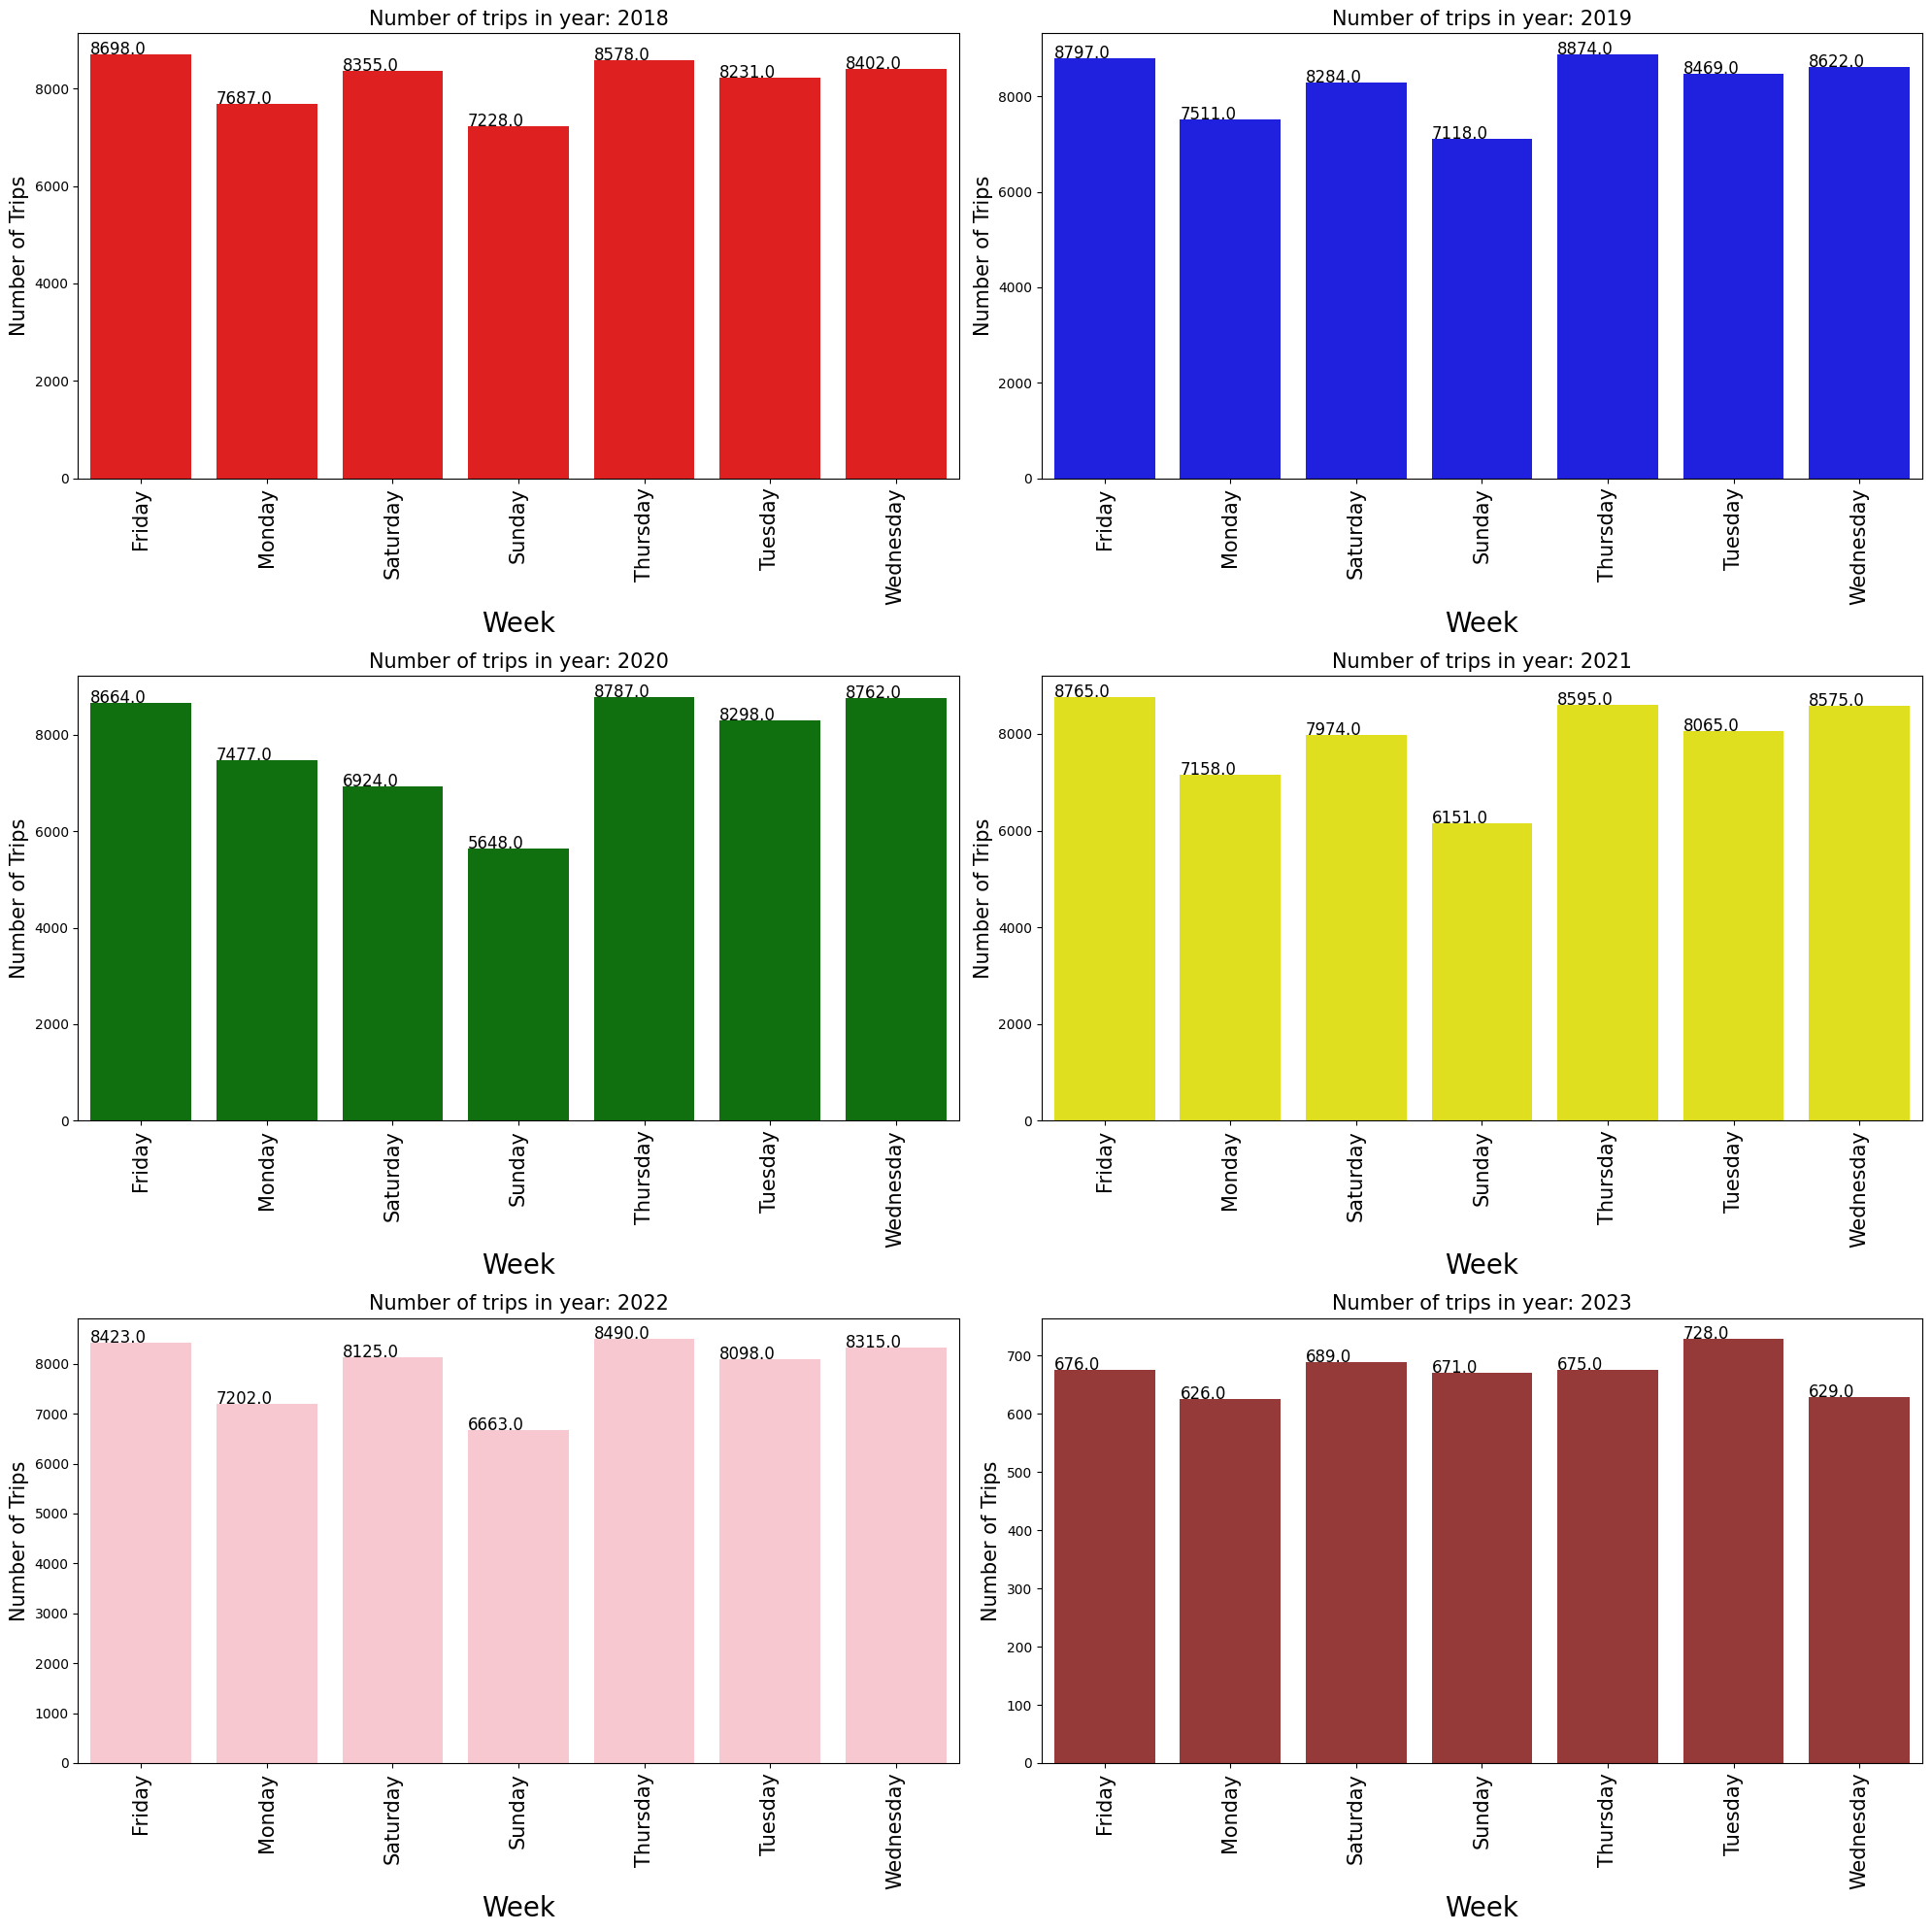

In [76]:
fig, ax = plt.subplots(3,2, figsize = (20,20))

year = [2018,2019,2020,2021,2022,2023]
colors = ['red','blue','green','yellow','pink','brown']

for m, a, c in (zip(year, ax.flatten(),colors)):
    g = sns.barplot(x = 'weekday_name', y = 'num_trips', \
                    data = data_agg_week[(data_agg_week["year"] == m)], ax = a, color = c)
    a.set_title("Number of trips in year: " + str(m), fontsize = 15)
    a.set_xlabel("Week", fontsize = 20)
    a.set_ylabel("Number of Trips", fontsize = 15)
#     g.set_ylim(0, 130)
    g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)
    for p in g.patches:
        text = str(np.nan_to_num(p.get_height(), 0).round(2))
        text_x = p.get_x()
        text_y = np.nan_to_num(p.get_height(),0)
        g.text(text_x,text_y,text,fontsize = 12)
fig.tight_layout()
plt.show()

**Observation:** The presented set of graphs depicts the pattern of total trip counts occurring on weekdays over the course of multiple years. It's evident that the lowest number of trips occurs on Sundays, followed by Mondays. On the other hand, the highest volume of trips takes place on Wednesdays, Thursdays, and Fridays.

### 6.7 Number of Trips versus Trip Distance

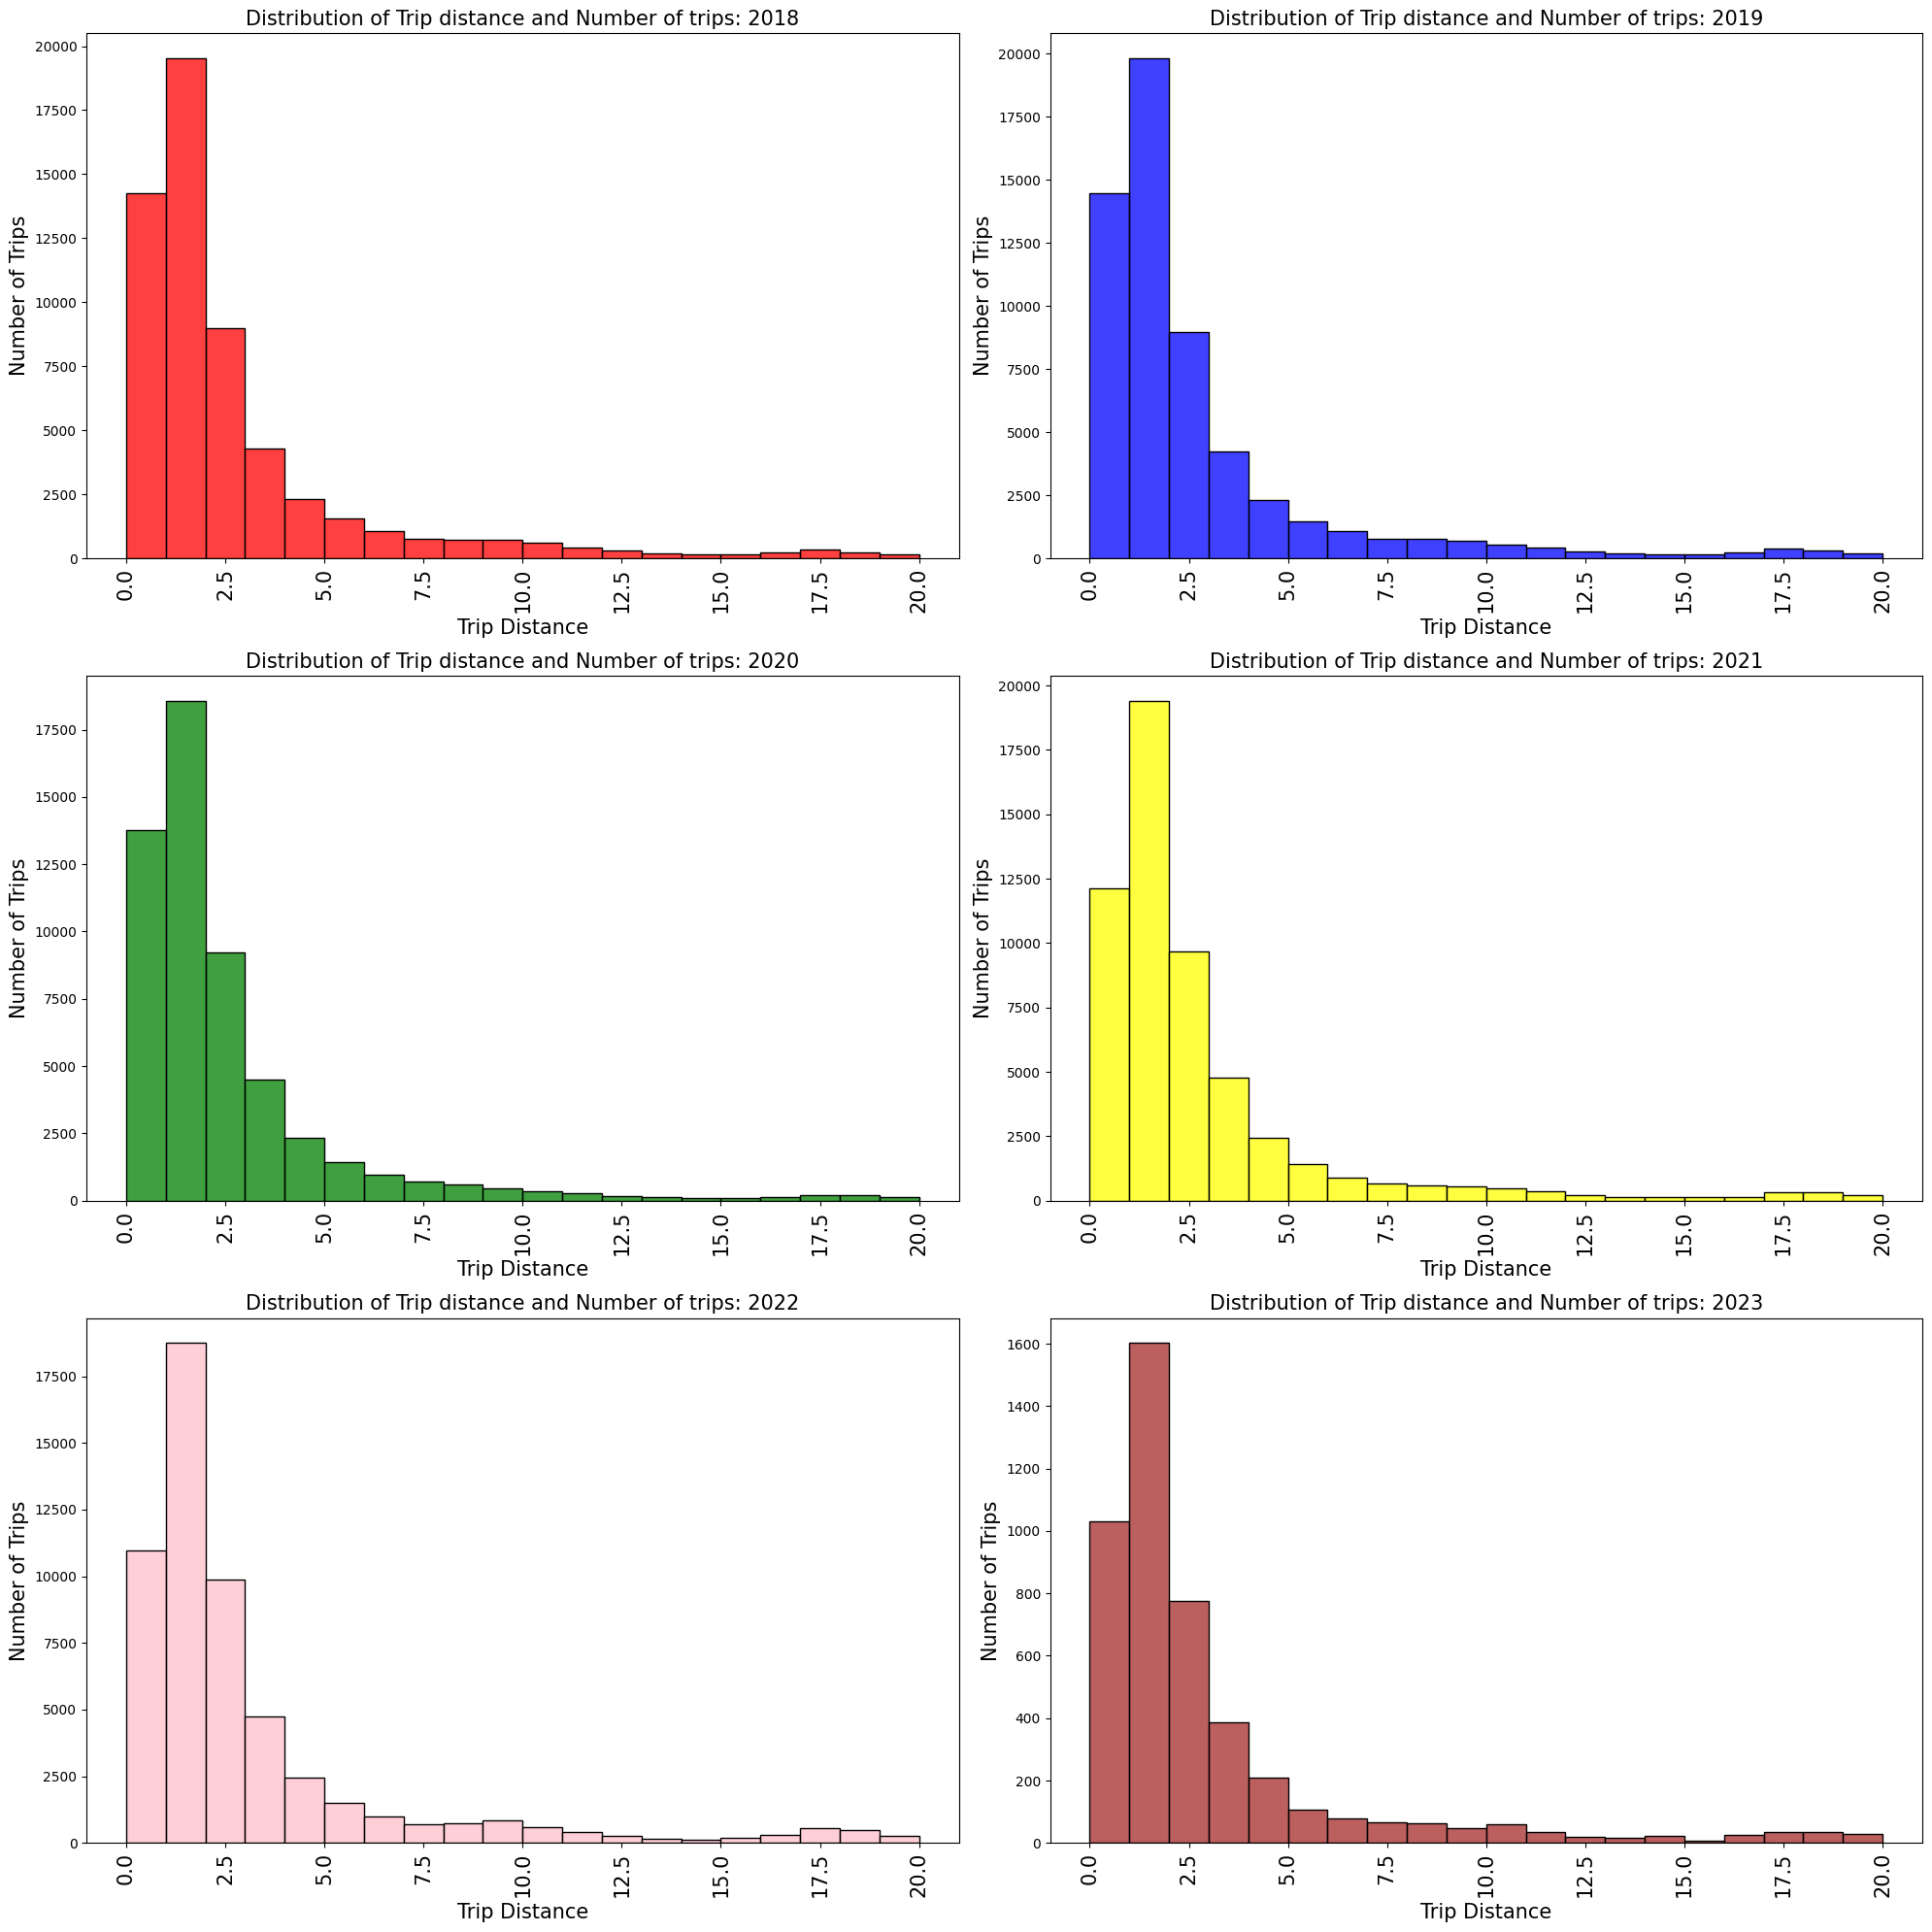

In [77]:
fig, ax = plt.subplots(3,2, figsize = (20,20))

year = [2018,2019,2020,2021,2022,2023]
colors = ['red','blue','green','yellow','pink','brown']

for m, a, c in (zip(year, ax.flatten(),colors)):
    g = sns.histplot(x = 'trip_distance', data = filtered_df[(filtered_df["year"] == m)], binwidth=1,binrange=(0,20), ax = a, color = c)
    a.set_title("Distribution of Trip distance and Number of trips: " + str(m), fontsize = 15)
    a.set_xlabel("Trip Distance", fontsize = 15)
    a.set_ylabel("Number of Trips", fontsize = 15)
    g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 15)
fig.tight_layout()
plt.show()

**Observation:** Most of the journeys have a trip distance of less than 5 miles. This implies that yellow taxis are predominantly utilized for short distance, often for 1 to 3 miles.

### 6.8 Average Trip amount over the years

In [78]:
total_amount_avg_df=filtered_df.groupby(['year']).agg({'total_amount':'mean'}).reset_index()

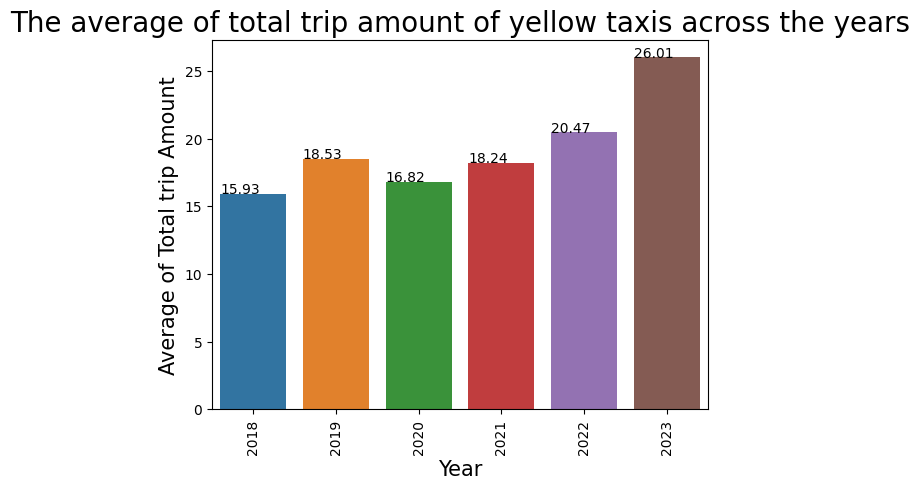

In [79]:
g = sns.barplot(data=total_amount_avg_df, x="year", y="total_amount")
g.set_title("The average of total trip amount of yellow taxis across the years", fontsize = 20)
g.set_xlabel("Year", fontsize = 15)
g.set_ylabel("Average of Total trip Amount", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 10)
for p in g.patches:
    text = str(np.nan_to_num(p.get_height(), 0).round(2))
    text_x = p.get_x()
    text_y = np.nan_to_num(p.get_height(),0)
    g.text(text_x,text_y,text,fontsize = 10)  
plt.show()

**Observation:** The average of the entire total trip cost for a yellow taxi ride within New York City stood at \\$15.93 in the year 2018, which was increased to \\$20.47 by 2022.

### 6.9 Average Toll amount  distributed across the boroughs of NYC.

In [80]:
toll_amount_df = filtered_df.groupby(['DOborough']).agg({'tolls_amount':'mean'}).reset_index(). \
                            sort_values(by='tolls_amount',ascending=False)

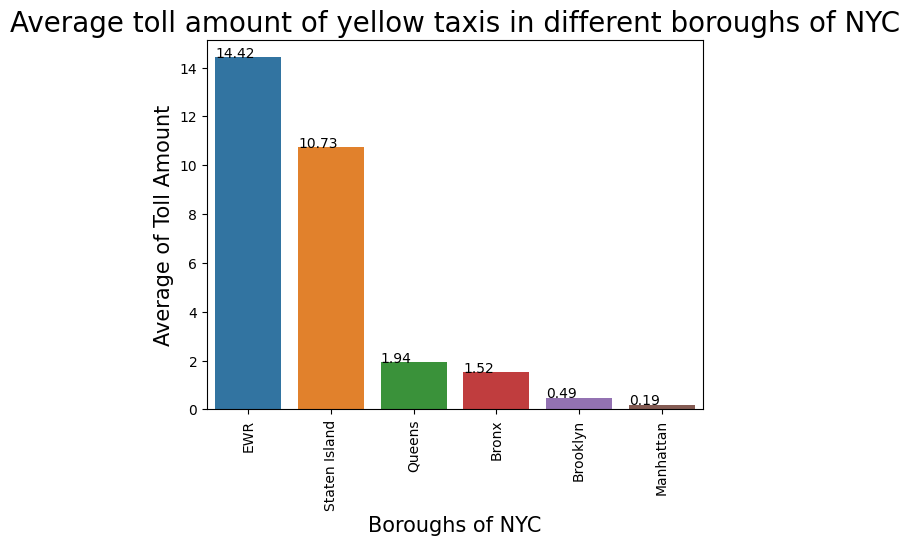

In [81]:
g = sns.barplot(data=toll_amount_df, x="DOborough", y="tolls_amount", \
                order = toll_amount_df['DOborough'])
g.set_title("Average toll amount of yellow taxis in different boroughs of NYC", fontsize = 20)
g.set_xlabel("Boroughs of NYC", fontsize = 15)
g.set_ylabel("Average of Toll Amount", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 10)
for p in g.patches:
    text = str(np.nan_to_num(p.get_height(), 0).round(2))
    text_x = p.get_x()
    text_y = np.nan_to_num(p.get_height(),0)
    g.text(text_x,text_y,text,fontsize = 10)  
plt.show()

**Observation**: Average toll amount for the trips associated with Newark Airport (EWR) is \\$14.42 followed by \\$10.73 for Staten Island and very minimal amount for Manhattan. This will also contribute to the fact that EWR has the highest total cost for the yellow taxi trips in NYC.

### 6.10 Total trip costs distributed across the boroughs of NYC.

In [82]:
total_amount_avg_borough_df=filtered_df.groupby(['DOborough']).agg({'total_amount':'mean'}).reset_index(). \
                            sort_values(by='total_amount',ascending=False)

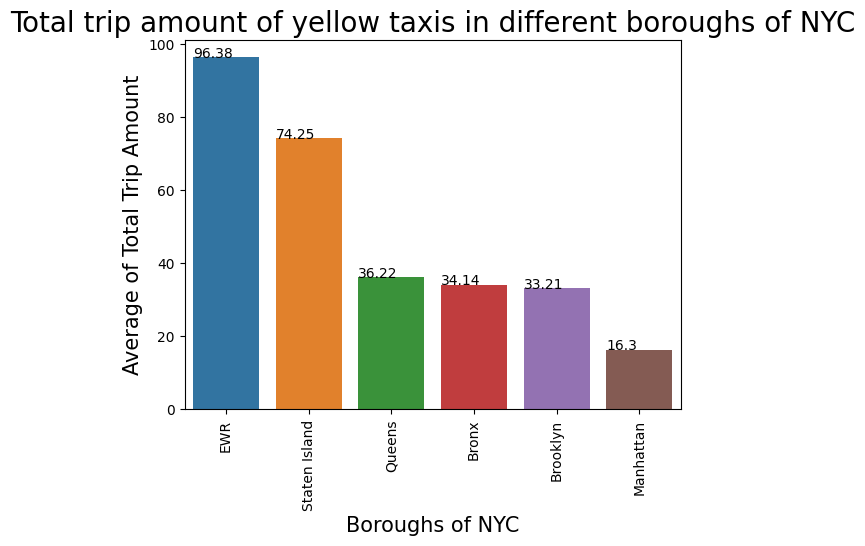

In [83]:
g = sns.barplot(data=total_amount_avg_borough_df, x="DOborough", y="total_amount", \
                order = total_amount_avg_borough_df['DOborough'])
g.set_title("Total trip amount of yellow taxis in different boroughs of NYC", fontsize = 20)
g.set_xlabel("Boroughs of NYC", fontsize = 15)
g.set_ylabel("Average of Total Trip Amount", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 10)
for p in g.patches:
    text = str(np.nan_to_num(p.get_height(), 0).round(2))
    text_x = p.get_x()
    text_y = np.nan_to_num(p.get_height(),0)
    g.text(text_x,text_y,text,fontsize = 10)  
plt.show()

**Observation:** The total trip cost for a yellow taxi ride for bifferent boroughs of NYC is \\$96.38 for EWR (Newark Airport), \\$74.25 for Staten Island, \\$36.22 for Queens, \\$34.14 for Bronx, \\$33.21 for Brooklyn and \\$16.3 for Manhattan. 

It's evident that the travel expenses are notably higher for journeys involving Newark airport, requiring the use of a Newark Taxi rather than a New York City taxi. From the earlier analysis, it is evident that the toll charges are considerably higher for EWR borough. As a result, trips concluding at EWR (Newark airport) or commencing from there exhibit the highest overall trip costs.

### 6.11 Average fare amount across the boroughs of NYC

In [84]:
fare_amount_mean_borough_df=filtered_df.groupby(['DOborough']).agg({'fare_amount':'mean'}).reset_index(). \
                            sort_values(by='fare_amount',ascending=False)

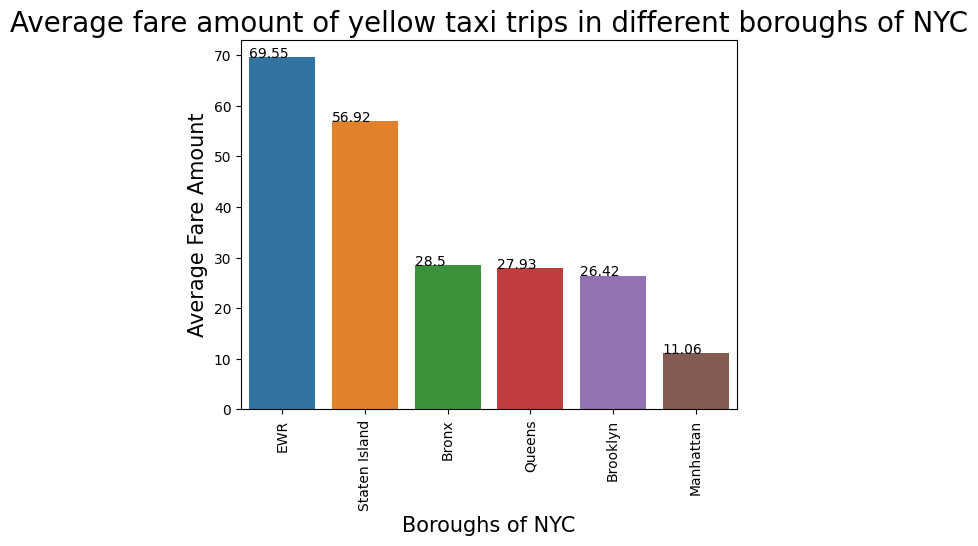

In [85]:
g = sns.barplot(data=fare_amount_mean_borough_df, x="DOborough", y="fare_amount", order = fare_amount_mean_borough_df['DOborough'])
g.set_title("Average fare amount of yellow taxi trips in different boroughs of NYC", fontsize = 20)
g.set_xlabel("Boroughs of NYC", fontsize = 15)
g.set_ylabel("Average Fare Amount", fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)
g.set_yticklabels(g.get_yticklabels(),  fontsize = 10)
for p in g.patches:
    text = str(np.nan_to_num(p.get_height(), 0).round(2))
    text_x = p.get_x()
    text_y = np.nan_to_num(p.get_height(),0)
    g.text(text_x,text_y,text,fontsize = 10)  
plt.show()

**Observation**:  The mean fare cost for a yellow taxi ride for diffrent boroughs of NYC is shown in the above figure.
It is \\$69.55 for EWR (Newark Airport), followed by \\$56.92 for Staten Island and Manhattan having the least fare amount of \\$11.06.

### 6.12 Distribution of Fare amount, Total amount and Tip amount across month over the years

In [86]:
def plot_graphs(x,y,data,title,xlabel,ylabel):
    g = sns.lineplot(x=x, y=y, hue='year', data=data, \
                ax = a,sort = True, marker = 'o', linewidth = 3,legend=True, palette = sns.color_palette("tab10"))
    a.set_title(title, fontsize = 20)
    a.set_xlabel(xlabel, fontsize = 20)
    a.set_ylabel(ylabel, fontsize = 20)
    a.set_xticklabels(a.get_xticklabels(), fontsize = 20)
    a.tick_params(axis="y", labelsize=20)
    a.legend(loc='upper left', fontsize = 20)

In [87]:
fare_total_tip_sum_df = filtered_df.groupby(['year','month']).agg({'fare_amount':'sum','total_amount':'sum','tip_amount':'sum'}).reset_index()
fare_total_tip_mean_df = filtered_df.groupby(['year','month']).agg({'fare_amount':'mean','total_amount':'mean','tip_amount':'mean'}).reset_index()

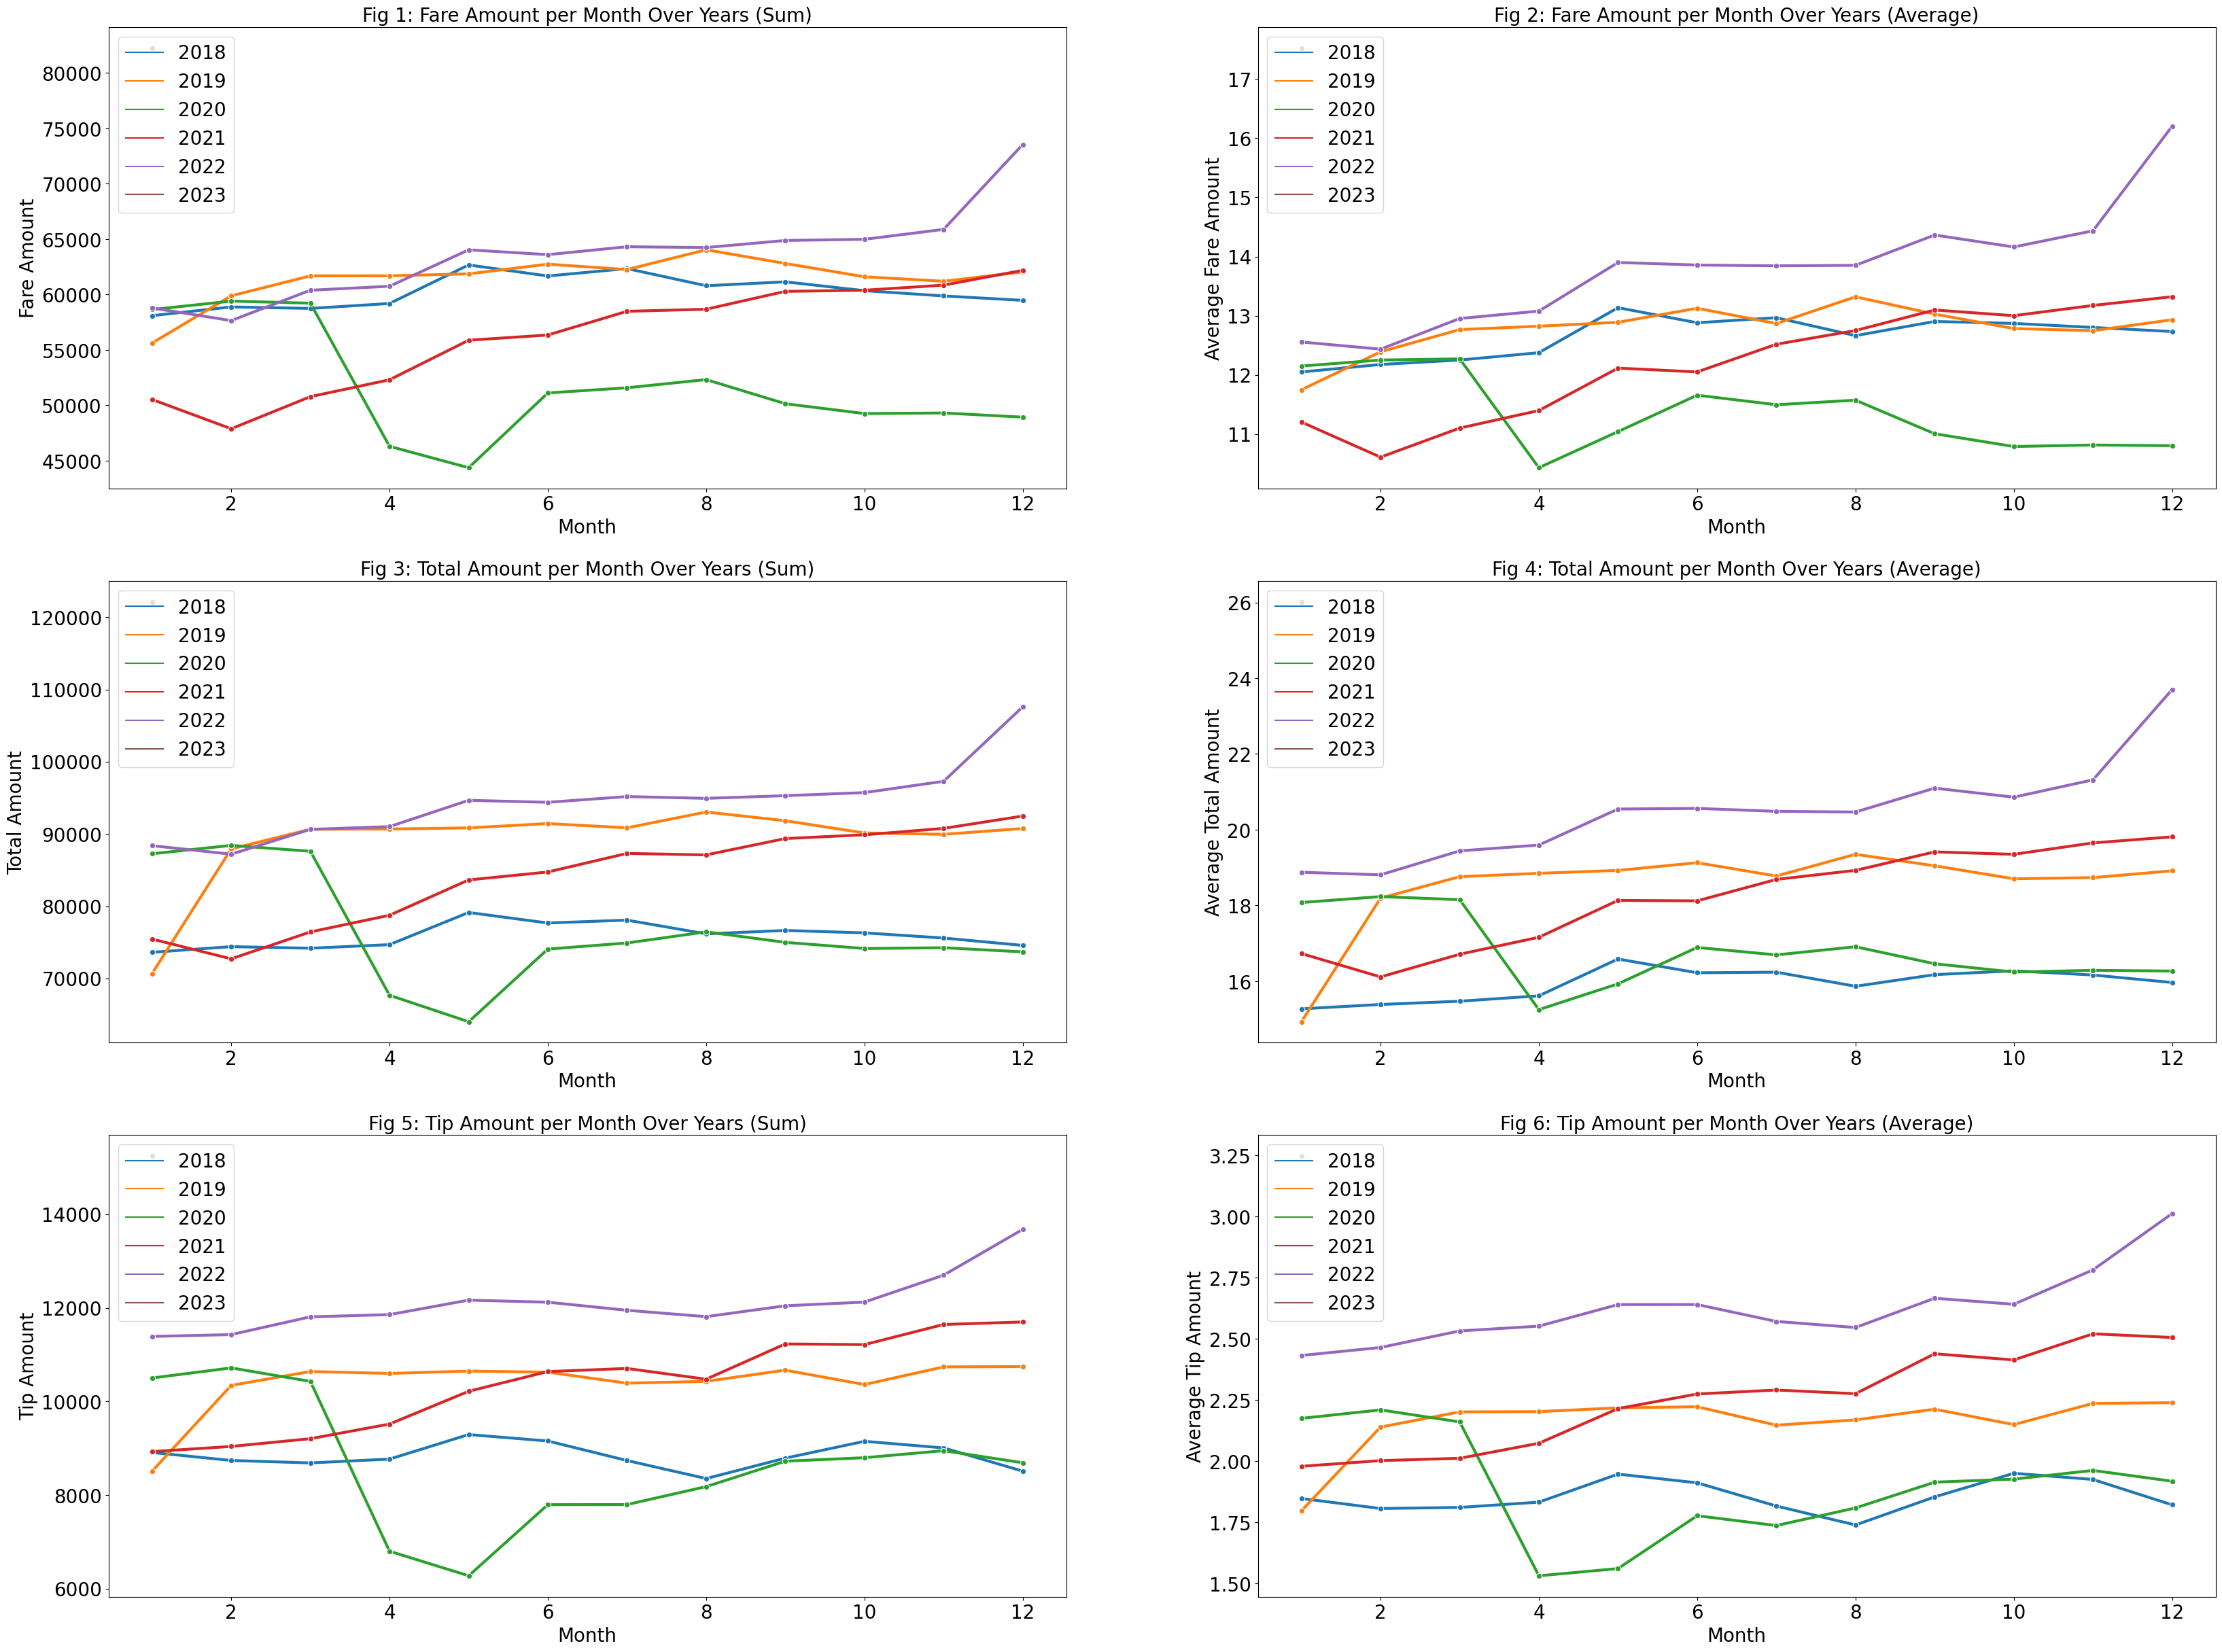

In [88]:
fig, ax = plt.subplots(3,2, figsize = (40,30))
for i,a in enumerate(ax.flatten()):
    if (i==0):
        plot_graphs("month", "fare_amount",fare_total_tip_sum_df, "Fig 1: Fare Amount per Month Over Years (Sum)", "Month", "Fare Amount")
    elif (i==1):
        plot_graphs("month", "fare_amount",fare_total_tip_mean_df, "Fig 2: Fare Amount per Month Over Years (Average)", "Month", "Average Fare Amount")
    elif (i==2):
        plot_graphs("month", "total_amount",fare_total_tip_sum_df, "Fig 3: Total Amount per Month Over Years (Sum)", "Month", "Total Amount")
    elif (i==3):
        plot_graphs("month", "total_amount",fare_total_tip_mean_df, "Fig 4: Total Amount per Month Over Years (Average)", "Month", "Average Total Amount")
    elif (i==4):
        plot_graphs("month", "tip_amount",fare_total_tip_sum_df, "Fig 5: Tip Amount per Month Over Years (Sum)", "Month", "Tip Amount")
    else:
        plot_graphs("month", "tip_amount",fare_total_tip_mean_df, "Fig 6: Tip Amount per Month Over Years (Average)", "Month", "Average Tip Amount")

Figure 2 demonstrates the progression of the **Average Fare Amount** per month for each year. An analysis of the data reveals a consistent number of trips annually. Despite this constancy, the Fare amount has exhibited a progressive increase over the course of these 5 years. Notably, there is a substantial decline in the average fare amount during March 2020, likely attributed to the Covid lockdown implemented at the beginning of that month in New York City, USA. Subsequent to this dip, a gradual recovery is evident starting from April 2020. The entire data for the year 2020 indicates a downturn across all three components: fare amount, total amount, and tip amount. Notably, the year 2022 witnessed the highest fare amount per trip in December. Specifically, the average fare amount was approximately \\$13 in December 2020, in contrast to \\$17 in December 2022. A pronounced surge in fare amount becomes evident post the Covid-related disruptions.

Figure 4 presents the **Average Total Amount** per trip across months for the entire 5-year span. A discernible pattern shows an average increase of \\$5 per trip from 2018 to 2022. Within 2022 itself, the average total amount ranged from approximately \\$19 in January to \\$24 in December. This signifies an average increase of \\$5 per trip during the same year.

Figure 6 outlines the variation in **Average Tip Amount** both within a year and across the years. The mean tip per trip was around \\$1.8 in January 2018, escalating to approximately \\$2.5 in January 2022, and subsequently rising to \\$3.15 by December 2022. This surge might be attributed to the holiday season around Christmas and vacations.

An overarching conclusion can be drawn from Figures 1, 3, and 5, indicating substantial enhancement in Fare Amount, Total Amount, and Tip amount in the year 2022 when compared to 2018.

### 6.13 Number of Trips that costed Extra amount for the passengers

In [89]:
df_trips_per_hour = filtered_df.groupby('hour').agg({'VendorID':'count'}).reset_index().rename(columns={'VendorID':'Counts'}) 
df_trips_per_hour['hour']  = df_trips_per_hour['hour'].astype(str)

In [90]:
df_trips_per_hour_extra = filtered_df[filtered_df['extra']>0].groupby('hour').agg({'VendorID':'count'}).reset_index()\
                            .rename(columns={'VendorID':'Counts'}) 
df_trips_per_hour_extra['hour']  = df_trips_per_hour_extra['hour'].astype(str)

Text(0, 0.5, 'Hour')

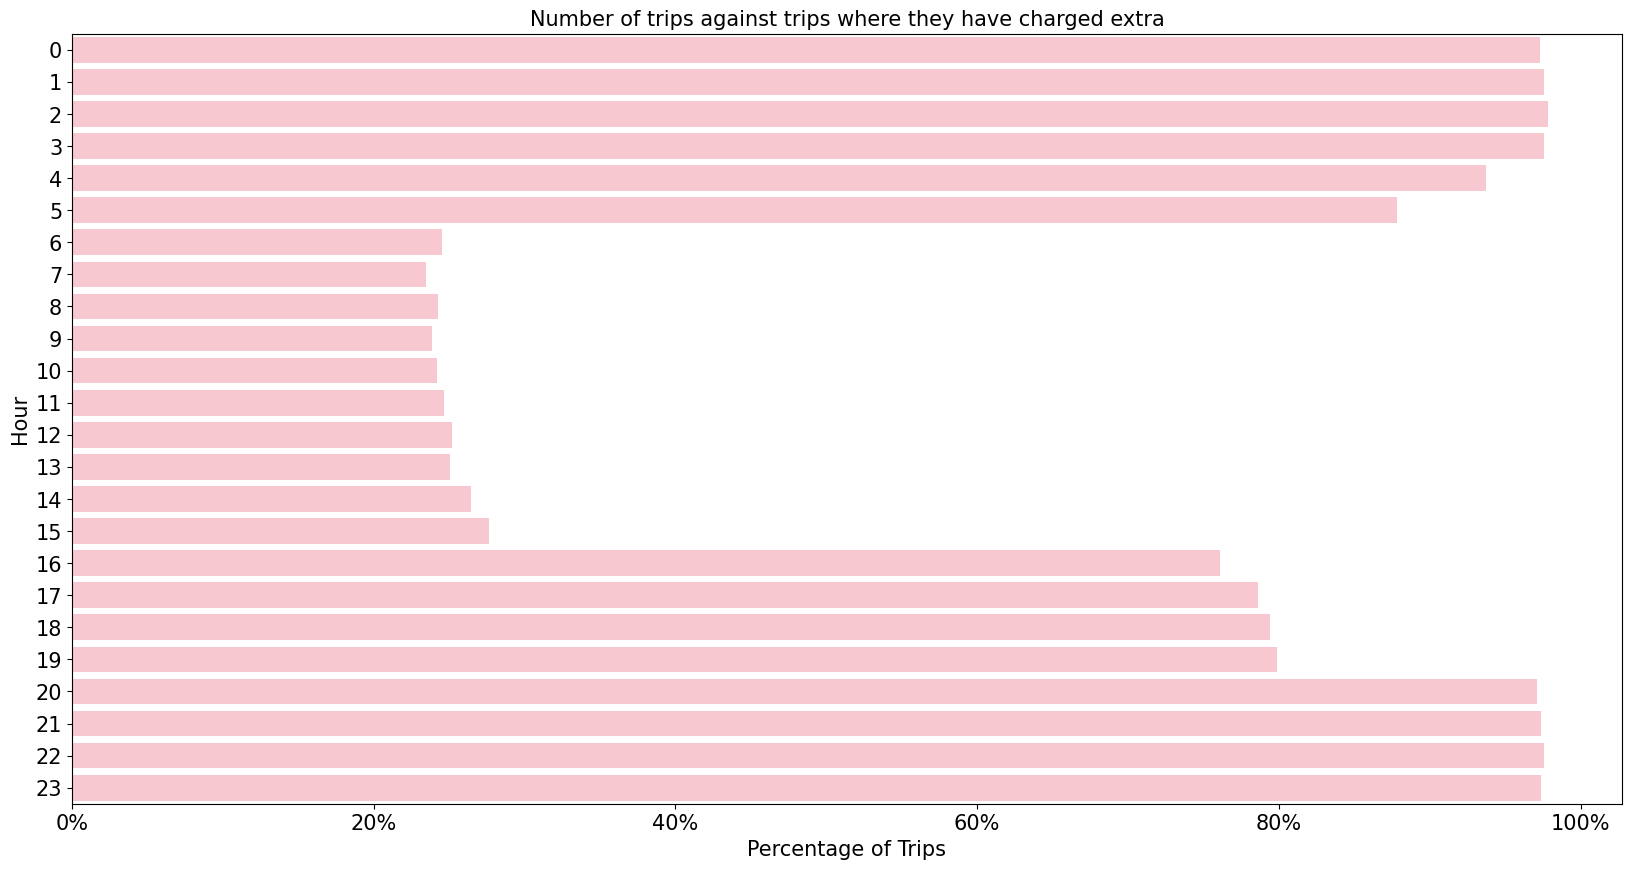

In [91]:
df_trips_per_hour_comp = df_trips_per_hour.merge(df_trips_per_hour_extra,on='hour',how='inner').rename(columns={'Counts_x':'no_of_trips', \
'Counts_y':'no_of_trips_extra'})

df_trips_per_hour_comp['percentage'] = (df_trips_per_hour_comp['no_of_trips_extra']/df_trips_per_hour_comp['no_of_trips'])

import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1,figsize = (20,10))
g = sns.barplot(x="percentage", y="hour", data=df_trips_per_hour_comp,color = 'pink')
ax.set_title("Number of trips against trips where they have charged extra" , fontsize = 15)
ax.set_xlabel("Percentage of Trips", fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.set_ylabel("Hour", fontsize = 15)

Drivers have imposed an additional fee (rush hour charges) for rides commencing between 4pm and 8pm. Approximately 80% of the rides taking place from 4pm to 8pm incur rush hour charges. 

The highest surcharges (Overnight charges) were applied to trips occurring between 8pm and 12am, closely followed by the period from 1am to 5am in the early morning. Over 90% of the trips occurring between 8pm and 5am are charged overnight extra fees.


## Summary:


* The collection of airport fees has been inconsistent, with no fees recorded at airports but fees present at non-airport locations. This discrepancy raises concerns. It's plausible that data generated by Creative Mobile Technologies, LLC might lack full accuracy.

* Certain records indicate a total amount below zero, with the majority belonging to the "Dispute" and "No charge" types.

* Approximately 4,700 trips occur on average each month over the years. Sundays witness the fewest trips, while Thursdays and Fridays experience the highest traffic.

* There has been a noteworthy increase in fare amount and total trip cost from 2018 to 2022.

* A dip in trip numbers occurred during March and April 2020, which remained relatively constant throughout the year due to the COVID-19 lockdown in NYC, USA.

* The Upper East Side South stands out as the most frequently picked up location in NYC. Conversely, the Upper East Side North serves as the most common drop-off spot.

* Yellow taxis are primarily utilized for shorter trips, covering distances of less than 2.5 miles. Solo travelers constitute the majority of passengers.

* Credit card payments are the dominant mode of payment.

* The time frame from 4pm to 8pm is considered rush hour, with the highest additional charges applied between 8pm and 5am.

* The average total trip cost for a yellow taxi ride within NYC was \\$16.4 in 2018, rising to \\$26.26 by 2022.

* Trips associated with Newark Airport (EWR) bear an average toll of \\$14.6, whereas Manhattan exhibits minimal toll  charges.

* Total trip costs for EWR (Newark Airport) amount to \\$98.65, while Manhattan's is $16.55. EWR experiences notably higher toll charges, contributing to its elevated overall trip expenses.

* The average fare for EWR (Newark Airport) rides is \\$71.5, whereas Manhattan boasts the lowest fare of \\$11.26.

